In [530]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st

# Introdução 
Este trabalho dedica-se a analisar um conjunto de dados de um hospital, referente a pacientes que estão internados na UTI. Os dados foram obtidos através do Kaggle, uma plataforma de competição de ciência de dados(https://www.kaggle.com/competitions/patient-survival-prediction/data?select=test.csv).  
A base de dados dispõe de informações de exames dos pacientes, contendo por exemplo: diagnósticos para saber se o paciente tem diabetes; biópsia para verificar se o paciente possui algum tumor, além de aferições como temperatura, frequência respiratória, etc. Além disso, dados como idade, peso, índice de massa corporal, dentre outras medidas, também estão contidas no referido conjunto de dados.  
A maioria das variáveis contidas no dataset possui grande relação com o sistema de pontuação APACHE III (Acute Physiology and Chronic Health Evaluation). Sistemas de pontuação como o APACHE, são extremamente importantes para a enfermagem. Eles auxiliam enfermeiros de prática avançada (APNs) e médicos a determinar a gravidade da condição do paciente, conforme necessário. Essas variaveis pontuam no sistema APACHE III e quanto maior a pontuação mais grave é a situação do paciente na UTI.   
O objetivo de explorar esse conjunto de dados é buscar prever a mortalidade dos pacientes na UTI, obtendo assim previsões sobre condições dos pacientes que levam a morte.   
Inicialmente, se faz necessário uma análise descritiva dos dados, de modo a interpretar, descrever e resumir o conjunto de dados analisados.

# Análise descritiva dos dados

## Funções 
Aqui definimos as funções que seraõ utilizadas para uma análise descritiva do nosso conjunto de dados.

In [531]:
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
          
     dados_grafico = dataframe[var].value_counts()
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência:{var}')
 
 
 
def distribuição_de_Frequência(varName,dataframe):
    x = dataframe[varName]
    n = len(x)
    sqrt_n = np.sqrt(n)
    k = round(sqrt_n)
    dfTempoFalha = x.value_counts(bins=k, 
                            sort=False)
    display(pd.DataFrame(dfTempoFalha))


def histograma(varName, dataframe):
    dados_quantitativa = dataframe[varName].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':varName})
    display(dados_quantitativa.head)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=100, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()
    
    
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " +  varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12) 
    
def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    return moda     


def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variavel": key ,"Quantidade": len(data),"Media": [st.mean(data.dropna())], "Moda ": moda_czuber(data.dropna()), "Mediana": [st.median(data.dropna())], "Variancia": [st.variance(data.dropna())], "Desvio padrao": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset


def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())
    
    
def scater(varName1,varName2,dataframe,ax = None):
    if ax is None:
         _, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(dataframe[varName1], dataframe[varName2])
    title = varName1 + " per " + varName2
    ax.set_title(title)
    ax.set_xlabel(varName1)
    ax.set_ylabel(varName2)    




* Abaixo podemos ver informações do nosso conjunto de dados, como a tabela, e informações como tipo e número de dados de cada coluna. 

In [532]:
nome_arquivo_csv = 'train.csv'
dados = pd.read_csv(nome_arquivo_csv)

In [533]:
display(dados)

,Unnamed: 0,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,82707,36751,69039,158,66.0,35.693127,0,Caucasian,F,152.40,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
1,80002,68336,127397,47,48.0,18.966902,0,African American,F,165.10,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,1
2,54817,71682,77670,27,76.0,19.278960,0,Caucasian,M,173.00,...,0.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
3,44799,114267,19566,100,43.0,45.617284,0,Caucasian,M,180.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary,NaN,0
4,50277,128055,104990,189,86.0,26.756678,0,Caucasian,F,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64194,7726,4290,41506,118,56.0,NaN,0,Caucasian,M,172.70,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
64195,6346,123461,40135,118,72.0,30.458746,0,Caucasian,M,175.30,...,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
64196,21627,14302,88156,161,27.0,27.476316,0,Other/Unknown,M,170.10,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
64197,62340,33753,81881,19,52.0,18.818924,0,Caucasian,F,163.00,...,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0


* Ao retirarmos as variáveis que são object podemos ver as correlações entre as variáveis de interesse, por isso abaixo vemos todos as variáveis e seus tipos.

* Ao verificar as correlações entre variáveis vemos uma lista de variáveis que tem as melhores correlações com hospital_death e assim podemos construir melhores gráficos.  

In [534]:
pd.set_option('display.max_rows',500)
data = dados.copy()
columns=['ethnicity',  'gender',  'icu_stay_type', 'icu_type', 'icu_admit_source', 'apache_3j_bodysystem', 'apache_2_bodysystem']
data.drop(columns, axis=1, inplace=True)
corr_matrix = data.corr()
corr_matrix["hospital_death"].sort_values(ascending=False)


hospital_death                   1.000000
apache_4a_hospital_death_prob    0.306263
apache_4a_icu_death_prob         0.280134
ventilated_apache                0.224943
intubated_apache                 0.170951
d1_heartrate_max                 0.162343
h1_resprate_max                  0.124165
h1_heartrate_max                 0.116115
h1_resprate_min                  0.114754
age                              0.112779
d1_potassium_max                 0.110966
heart_rate_apache                0.107136
d1_resprate_max                  0.106308
h1_heartrate_min                 0.088442
resprate_apache                  0.086645
d1_glucose_max                   0.075732
pre_icu_los_days                 0.064642
gcs_unable_apache                0.055023
solid_tumor_with_metastasis      0.048243
cirrhosis                        0.043549
hepatic_failure                  0.041202
immunosuppression                0.040945
d1_resprate_min                  0.029568
arf_apache                       0

Conforme dito anteriormente é necessário fazer uma análise descritiva dos dados para assim obter as informações mais relevantes dos nossos dados de treino, a fim de obter essas informações utilizaremos funções, bibliotecas e conceitos estatisticos.  
Aqui entendermos melhor as variaveis de maior interesse e como elas se relacionam. Elas serão dividas em duas categorias, serão variáveis qualitativas e quantitativas.Elas serão analisadas por meio de gráficos de forma que entendamos melhor seus comportamentos e suas frequências.  
As variáveis de interesse serão:  
* __gender__: O sexo genotípico do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização.
* __bmi_quali__ : indice de massa corporal dividido em categorias. 
* __cirrhosis__:  Se o paciente tem histórico de uso pesado de álcool com hipertensão portal e varizes, outras causas de cirrose com evidência de hipertensão portal e varizes ou cirrose comprovada por biópsia. Esta comorbidade não se aplica a pacientes com transplante de fígado funcionante.                     
* __hepatic_failure__:  Se o paciente tem cirrose e complicações adicionais, incluindo icterícia e ascite, sangramento gastrointestinal superior, encefalopatia hepática ou coma.                
* __immunosuppression__:Se o paciente teve seu sistema imunológico suprimido nos seis meses anteriores à admissão na UTI por algum dos seguintes motivos; radioterapia, quimioterapia, uso de drogas imunossupressoras não citotóxicas, esteróides em altas doses (pelo menos 0,3 mg/kg/dia de metilprednisolona ou equivalente por pelo menos 6 meses).
* __ventilated_apache__:Se o paciente foi ventilado de forma invasiva no momento da gasometria arterial com pontuação mais alta usando o algoritmo de pontuação de oxigenação, incluindo qualquer modo de ventilação com pressão positiva fornecida através de um circuito conectado a um tubo endotraqueal ou traqueostomia.      
* __intubated_apache__:Se o paciente foi intubado no momento da gasometria arterial de maior pontuação usada no escore de oxigenação.
 
As variáveis acima são qualitativas, veremos posteriormente se elas tem relação com a taxa de mortalidade. Elas foram escolhidas de modo a verificar se gênero, doenças e local de onde foram admitidas tem relação com morte.

__VARIAVEIS DE APACHE-III__
  
 Já as variáveis abaixo são qualitativas, serão analisadas para observar sua relação com a taxa de mortalidade, algumas delas foram escolihdas com base no diagnóstico APACHE-III pois são as categorias que mais pontuam nesse diagnóstico e assim podem ter grande interesse na taxa de mortalidade.  

* __heart_rate_apache__: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __temp_apache__: A temperatura medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __resprate_apache__: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __map_apache__: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
__apache_4a_hospital_death_prob__: A previsão probabilística APACHE IVa de mortalidade no hospital para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico.

### Variáveis Qualitativas

Diante do gráfico abaixo podemos perceber que a quantidade de homens a entrar na UTI é um pouco maior do que as mulheres.  
A quantidade de homens é aproximadamente 7% maior, porém não tem interferência significativa nas mortalidade.  
Sendo a quantidade de mortes por genêro feminino de 8,81% e a de morte por genêro masculino de 8,47%.

,gender,Frequência
0,M,0.538973
1,F,0.461027


******** Conditional Proportion: hospital_death per gender ********


hospital_death,0,1
gender,,
F,0.911899,0.088101
M,0.915303,0.084697


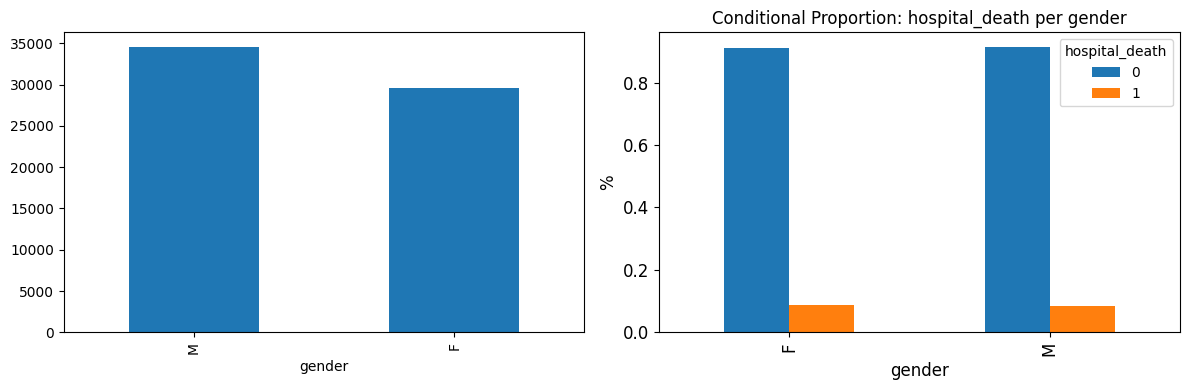

In [535]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já diante do gráfico univariado abaixo dos pacientes diagnosticados com leucemia vemos que somente 0,69% dos pacientes foram diagnosticados com essa condição, porém na análise do gráfico bivariado vemos uma interferência significativa na mortalidade.  
 Os pacientes que não foram diagnosticados com leucemia tem somente 8.53% na taxa de mortalidade enquanto os pacientes diagnosticados com leucemia tem 18.06% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.  
 Assim, pela análise obtida vemos que leucemia é uma variável de maior interesse por impactar na taxa de mortalidade. 

,leukemia,Frequência
0,0.0,0.993044
1,1.0,0.006956


******** Conditional Proportion: hospital_death per leukemia ********


hospital_death,0,1
leukemia,,
0.0,0.914664,0.085336
1.0,0.819413,0.180587


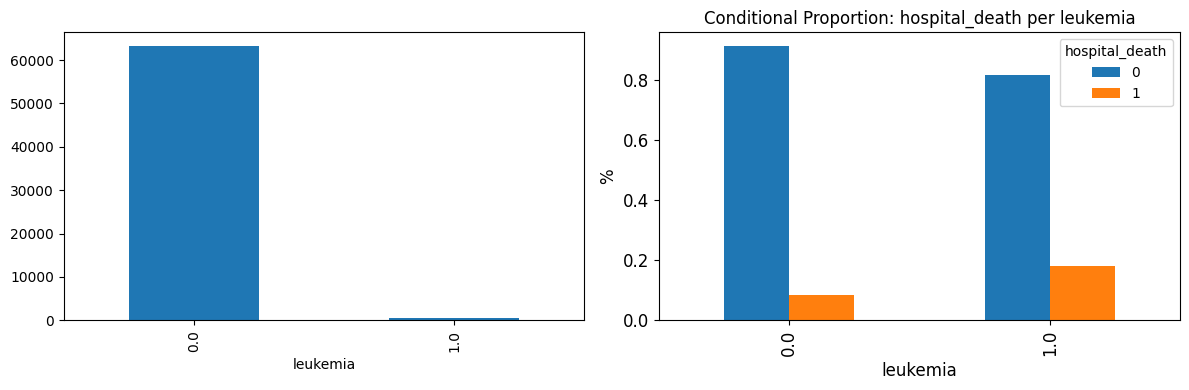

In [536]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já na análise do gráfico univariado abaixo de pacientes com diabetes vemos que uma quantidade de 22.40% possuem a doença enquanto 77.60% não possuem essa condição.  
Contudo, no gráfico bivariado vemos que a diabete não tem grande inteferência na taxa de mortalidade.
Dos pacientes que morreram 8.83% não possuiam a doença enquanto 7.79% possuiam a doença.  
Sendo assim, pela análise obtida vemos que a diabete não é uma variável de interesse pois mesmo com uma população consideravel de diagnosticos positivos de pacientes vemos que ela não interfere na taxa de mortalidade. 

,diabetes_mellitus,Frequência
0,0.0,0.775967
1,1.0,0.224033


******** Conditional Proportion: hospital_death per diabetes_mellitus ********


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911653,0.088347
1.0,0.922133,0.077867


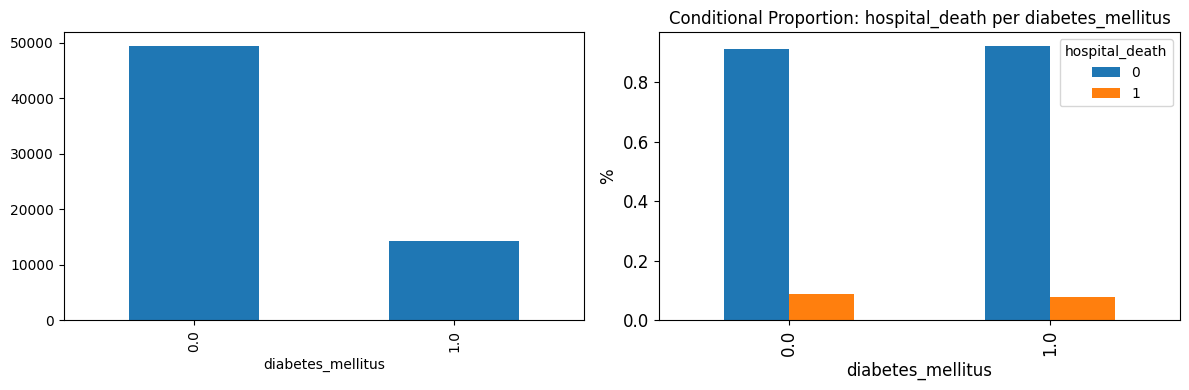

In [537]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo dos pacientes que possuem ou não tumor sólido com metástase vemos que somente 2.04% possuem a doença enquanto 97,95% não possuem essa condição.  
Porém, na análise bivariada vemos que este tumor possui uma grande interferência na taxa de mortalidade.   
Os pacientes que não foram diagnosticados com tumor sólido com metástase tem somente 8.40% na taxa de mortalidade enquanto os pacientes diagnosticados com tumor sólido com metástase tem 17.96% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.  
Logo, pela análise obtida podemos ver que tumor sólido com metástase é uma variável de maior interesse por impactar na taxa de mortalidade. 

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979541
1,1.0,0.020459


******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.915956,0.084044
1.0,0.820414,0.179586


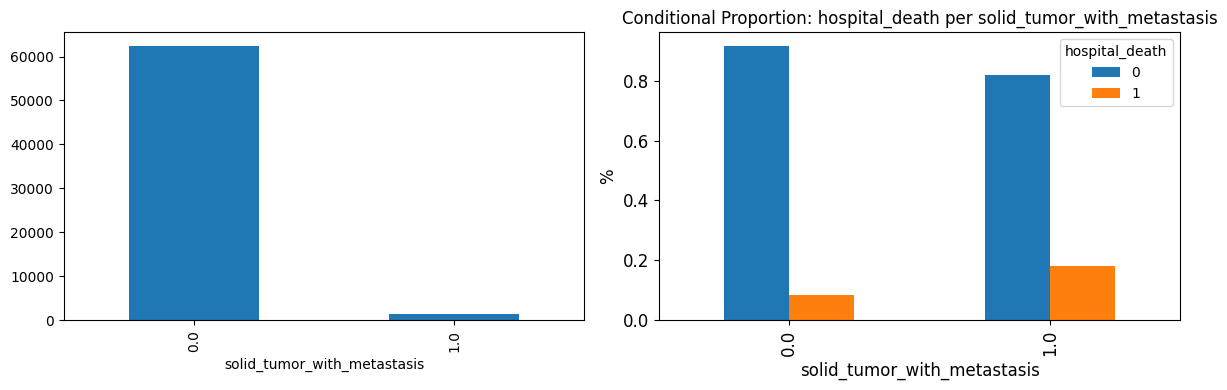

In [538]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo de localização do paciente antes de ser admitido na unidade vemos que a grande maioria dos pacientes vem da emergência e que a minoria vem de outras UTI´s e de outris hospital.   
Porém, na análise bivariada vemos que na taxa de mortalidade essas porcentagens se alteram.   
A localização que possui a maior porcentagem de mortalidade é dos pacientes vindos de outra UTI com 14.28% seguido por os pacientes vindos de outro hospital com 12.59% seguido por floor que possui 13.70%.  
Enquanto, a localização que possui a menor porcentagem de mortalidade é dos pacientes vindos sala de operação e recuperação com 03.69% e depois acidente e emergência com 08.60%.  
Portanto, podemos ver que os pacientes vindos de outra UTI e de outro hospital são as localizações de maior interesse por ter maior relação com a mortalidade.

,icu_admit_source,Frequência
0,Accident & Emergency,0.590904
1,Operating Room / Recovery,0.203472
2,Floor,0.170516
3,Other Hospital,0.025391
4,Other ICU,0.009717


******** Conditional Proportion: hospital_death per icu_admit_source ********


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.914007,0.085993
Floor,0.862984,0.137016
Operating Room / Recovery,0.963054,0.036946
Other Hospital,0.874079,0.125921
Other ICU,0.857143,0.142857


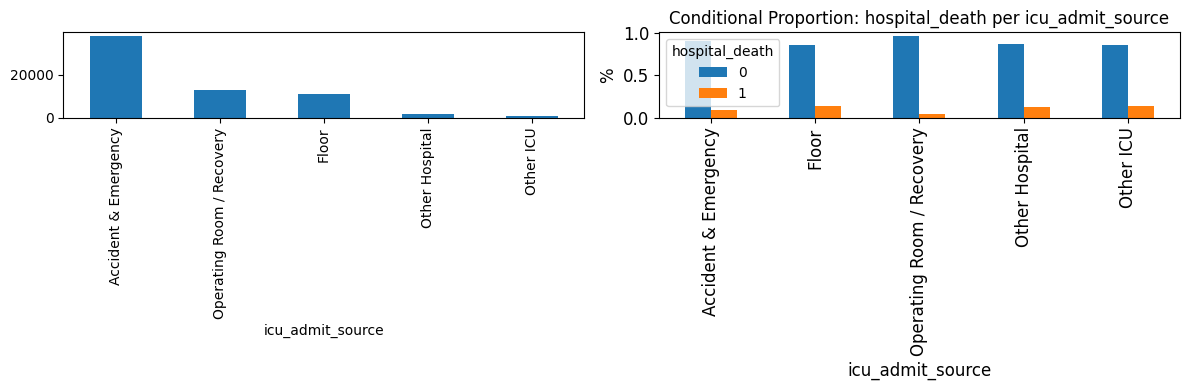

In [539]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo dos pacientes que possuem ou não insuficiência hepática vemos que somente 1.29% possuem essa condição enquanto 98.71% não possuem.  
Porém, na análise bivariada vemos que este condição possui uma grande interferência na taxa de mortalidade.   
Os pacientes que não foram diagnosticados com nsuficiência hepática tem somente 8.47% na taxa de mortalidade enquanto os pacientes diagnosticados com nsuficiência hepática tem 18.69% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.  
Logo, pela análise obtida podemos ver que tumor nsuficiência hepática é uma variável de maior interesse por impactar tanto na taxa de mortalidade. 

,hepatic_failure,Frequência
0,0.0,0.987062
1,1.0,0.012938


******** Conditional Proportion: hospital_death per hepatic_failure ********


hospital_death,0,1
hepatic_failure,,
0.0,0.915324,0.084676
1.0,0.813107,0.186893


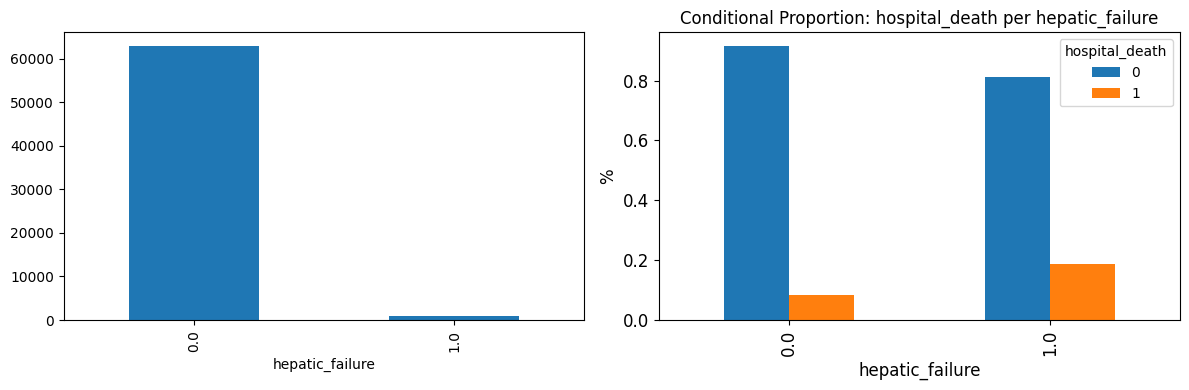

In [540]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("hepatic_failure", dados, axs[0])
QualiQualiAssociation("hepatic_failure","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo de cirrose vemos que a grande maioria dos pacientes não possuem esse diagnostico sendo 98.44% os que não possuem cirrose e sendo somente 1.56% dos pacientes com  essa condição.  
Já no gráfico bivariado vemos que a condição de cirrose tem grande impacto na morte dos pacientes.  
Das pessoas que vieram a obito 08.45% não possuam essa condição enquanto 18.29% possuem a condição de cirrose,sendo aproximadamente 10% maior do que as pessoa que não possuem essa condição.   
Portanto, vemos que essa condição possuem grande impacto na taxa de mortalidade.  

,cirrhosis,Frequência
0,0.0,0.984377
1,1.0,0.015623


******** Conditional Proportion: hospital_death per cirrhosis ********


hospital_death,0,1
cirrhosis,,
0.0,0.915539,0.084461
1.0,0.817085,0.182915


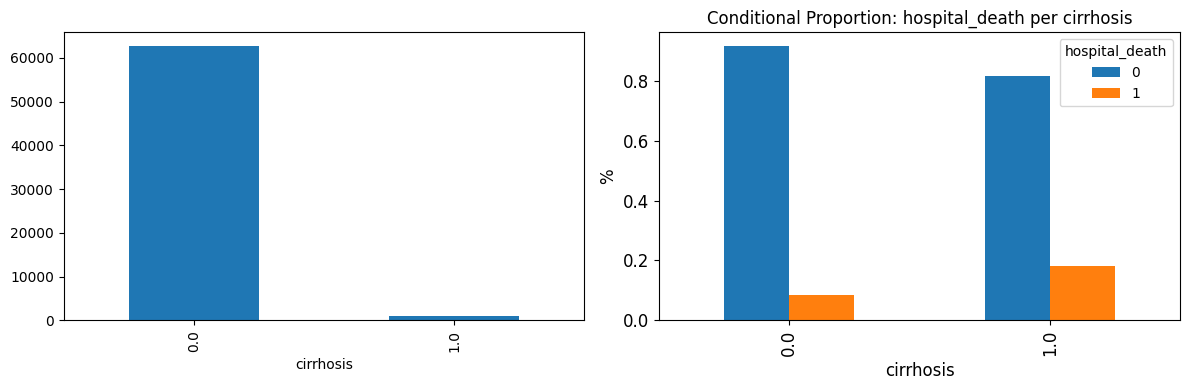

In [541]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("cirrhosis", dados, axs[0])
QualiQualiAssociation("cirrhosis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

Na análise univariada vemos que os pacientes diagnosticados com imunossupressão foram poucos, somente 02.60% tem essa condição enquanto 97.40% não tiveram esse diagnostico.  
Porém no gráfico bivariado vemos que ela tem impacto signifcativo na taxa de mortalidade, dos pacientes que vieram a obito 08.41% não tinham imunossupressão já os pacientes que morreram e tinham imunossupressão representam 15.62%, uma porcentagem que é significativa e pode ser vista melhor no gráfico abaixo.

,immunosuppression,Frequência
0,0.0,0.973966
1,1.0,0.026034


******** Conditional Proportion: hospital_death per immunosuppression ********


hospital_death,0,1
immunosuppression,,
0.0,0.915878,0.084122
1.0,0.843788,0.156212


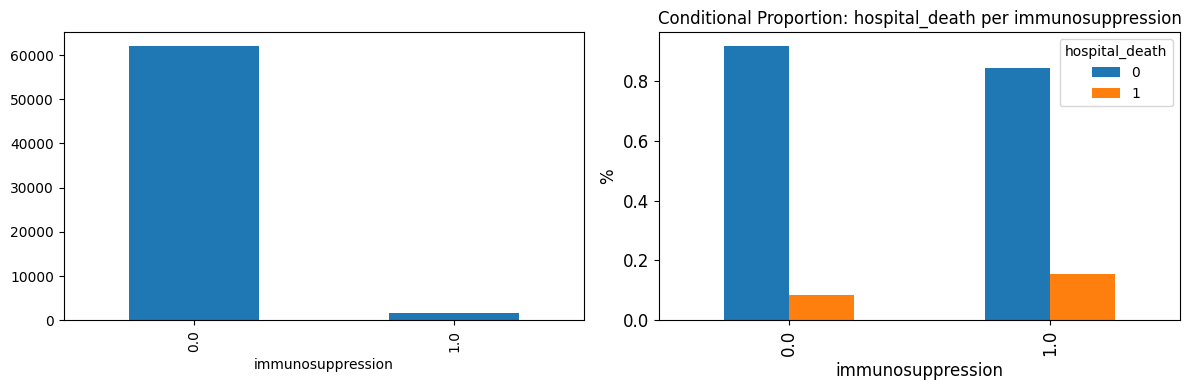

In [542]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("immunosuppression", dados, axs[0])
QualiQualiAssociation("immunosuppression","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo se o paciente foi ventilado de forma invasiva vemos um numero significativo de pacientes que receberam esse tratamento, sendo 32.58% da população que recebeu esse tratamento.  
Já na analise bivariada vemos que uma porcentagem de 04.22% de pessoas não foram submetidas a esse tratamento e morreram enquanto dos pacientes que morreram 17.67% foram submetidos.  
Assim, a condição de se o paciente foi ventilado de forma invasiva impacta aproximadamente 13% na taxa de mortalidade.

,ventilated_apache,Frequência
0,0.0,0.674172
1,1.0,0.325828


******** Conditional Proportion: hospital_death per ventilated_apache ********


hospital_death,0,1
ventilated_apache,,
0.0,0.957844,0.042156
1.0,0.823286,0.176714


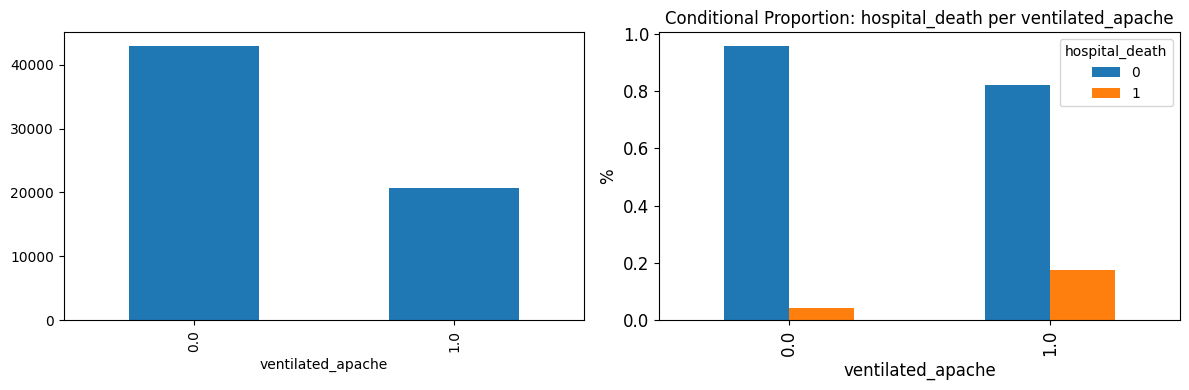

In [543]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("ventilated_apache", dados, axs[0])
QualiQualiAssociation("ventilated_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* No gráfico univariado de pacientes na condição de intubação vemos que 15.18% dos pacientes foram intubados enquanto 84.82% não foram submetidos a essa intubação.  
Já na análise bivariado vemos que essa condição tem um impacto significativo na taxa de mortalidade, dos pacientes que vieram a obito 06.57% não estavam em intubação, ja 19.93% estavam intubados o que revela uma porcentagem significativa nas mortes com 14% a mais dos que não estavam intubados e faleceram.

,intubated_apache,Frequência
0,0.0,0.848164
1,1.0,0.151836


******** Conditional Proportion: hospital_death per intubated_apache ********


hospital_death,0,1
intubated_apache,,
0.0,0.934280,0.065720
1.0,0.800724,0.199276


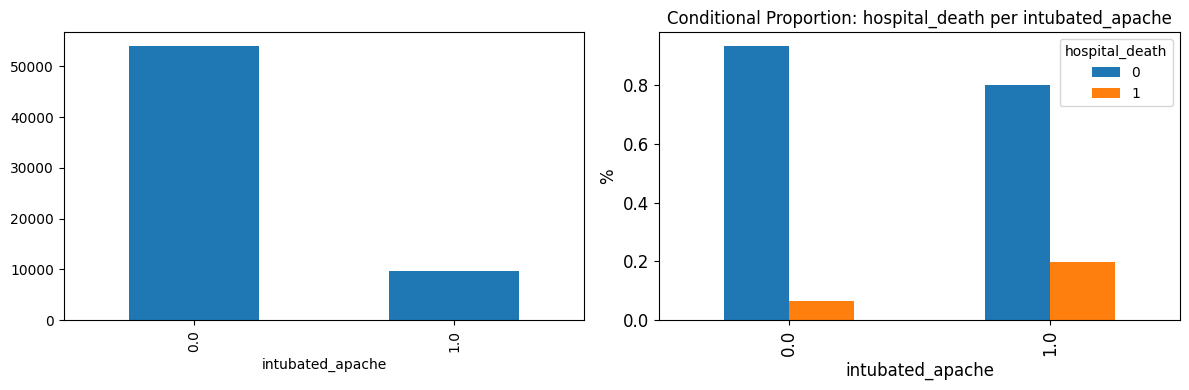

In [544]:


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("intubated_apache", dados, axs[0])
QualiQualiAssociation("intubated_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

### Variáveis Quantitativas

Como as variáveis de interesse nos fornece valores de referência por faixas etárias é importante analisar as medidas de posição e dispersão por idade. 

Pelos dados obtidos abaixo podemos dizer que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etaria e tambem os valores de referência fornecidos pelo ministerio da saúde.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  

In [545]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56119.0,61.727917,16.866711,16.0,52.0,64.0,75.0,89.0
1,5087.0,68.585610,14.445924,16.0,60.0,71.0,80.0,89.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,61.727917,67.0,64.0,284.485951,16.866711,73.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,68.58561,78.0,71.0,208.684716,14.445924,73.0


* No gráfico univariado e na distribuição de frequência abaixo de frequência cardíaca há uma concentração grande entre 45 e 60 bpm, mas que a maior concentração encontra-se entre 90 e 130.  
O gráfico em boxplot nos mostra que as medidas abaixo de 40 bpm e acima de 170 bpm já são considerados pontos aberrantes.  
Os valores esperados podem ser análisados de duas formas.  
Apartir das medidas de posição e dispersão vemos que a maioria dos pacientes estão acima dos 60 anos, portanto a frequência cardíaca esperada é entre 45 a 90 bpm.  
O Ministério da Saúde estabeleceu valores normais de referência entre 60 e 90 bpm.  
Assim, pela análise dessas duas referencias podemos perceber que a frequencia cardica dos pacientes em geral esta bastante elevada e tambem que não há muitos pacientes que estão dentro do intervalo considerado normal para frequência cardíaca.

<bound method NDFrame.head of      heart_rate_apache  Frequência
0                100.0    0.020417
1                102.0    0.019804
2                108.0    0.019709
3                104.0    0.019064
4                 98.0    0.019033
5                106.0    0.018482
6                 96.0    0.018294
7                 60.0    0.018246
8                112.0    0.018215
9                110.0    0.017995
10               114.0    0.017381
11               101.0    0.016107
12               105.0    0.016013
13               107.0    0.015997
14               103.0    0.015934
15               116.0    0.015777
16                94.0    0.015368
17               118.0    0.015321
18               120.0    0.014975
19                97.0    0.014896
20                92.0    0.014833
21               109.0    0.014739
22               111.0    0.014172
23                99.0    0.013999
24               113.0    0.013622
25                95.0    0.013370
26                58.0   

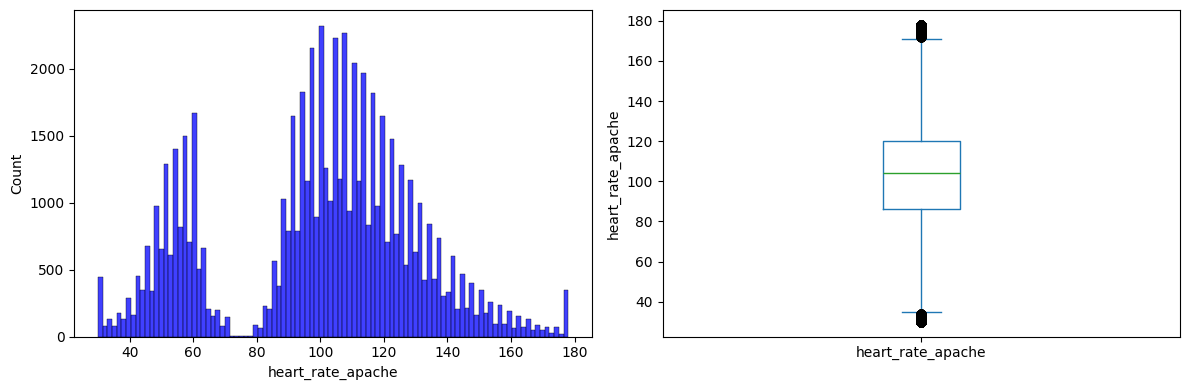

In [546]:
histograma("heart_rate_apache",dados)

* No gráfico univariado e na distribuição de frequência abaixo de pressão arterial percebemos que a maioria dos pacientes estão entre 40 e 80 de pressão arterial e que os outros estão distribuidos ao longo de de 110 a 200.  
O boxplot não possui pontos aberrantes e o grafico de barras nos mostra que a grande concentração de pessoas esta entre 40 e 60.

* Análisando o grafico bivariado abaixo de frequência cardiaca das pessoas por morte e por probabilidade de morte obtemos dados interessantes.  
Os pacientes que vieram a obito tiveram uma frequência cardiaca maior e isso é observado tanto no gráfico boxplot(à direita) quanto na tabela.  
Estes pacientes tem uma media mais elevada com aproximadamente 12 pontos a mais daqueles que não vieram a obito.  
 Além disso, no gráfico podemos ver que os pacientes que morreram não possuem pontos aberrantes para cima.  
Nas duas categorias de pacientes observamos que amédia de frequência cardiaca era acima dos valores de referência.  
No gráfico de disperssão(á esquerda) vemos o gráfico quase que inteiramente preenchido a não ser por um buraco entre 65 e 85 de frquência respiratoria.

heart_rate_apache                                            \
                           count        mean        std   min   25%    50%   
hospital_death                                                               
0                        58109.0   98.615739  30.339018  30.0  84.0  103.0   
1                         5465.0  110.411528  34.149646  30.0  96.0  115.0   

                              
                  75%    max  
hospital_death                
0               118.0  178.0  
1               133.0  178.0

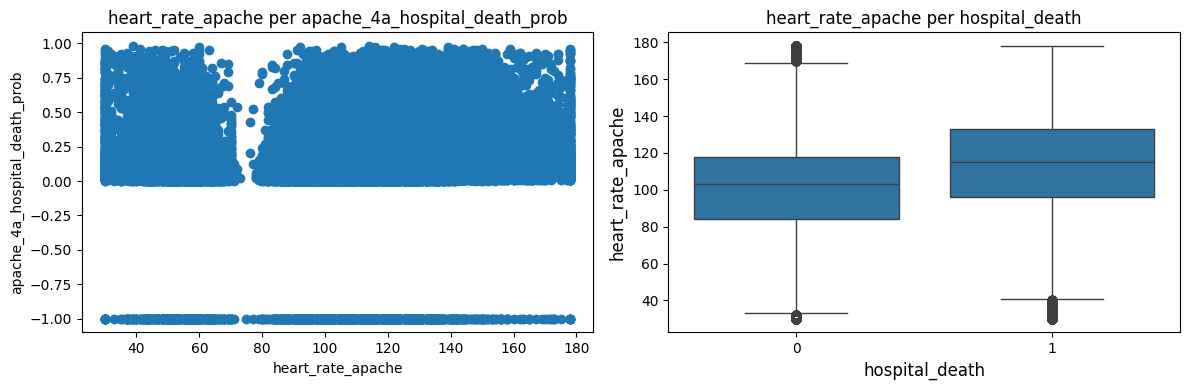

In [547]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("heart_rate_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("heart_rate_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

<bound method NDFrame.head of      map_apache  Frequência
0          56.0    0.022950
1          54.0    0.021769
2          58.0    0.021328
3          60.0    0.021312
4          55.0    0.021139
5          53.0    0.020950
6          52.0    0.020776
7          57.0    0.020666
8          40.0    0.020508
9          59.0    0.019957
10         51.0    0.019941
11         62.0    0.019485
12         50.0    0.019469
13         48.0    0.018587
14         61.0    0.018524
15         64.0    0.017925
16         63.0    0.017894
17         49.0    0.017248
18         47.0    0.016854
19         41.0    0.016397
20         65.0    0.015704
21         46.0    0.015515
22         43.0    0.015184
23         42.0    0.015027
24         45.0    0.014775
25         44.0    0.014523
26         66.0    0.014507
27         67.0    0.014035
28         68.0    0.013247
29         69.0    0.010995
30         70.0    0.010538
31        124.0    0.008774
32        120.0    0.008679
33        117.0   

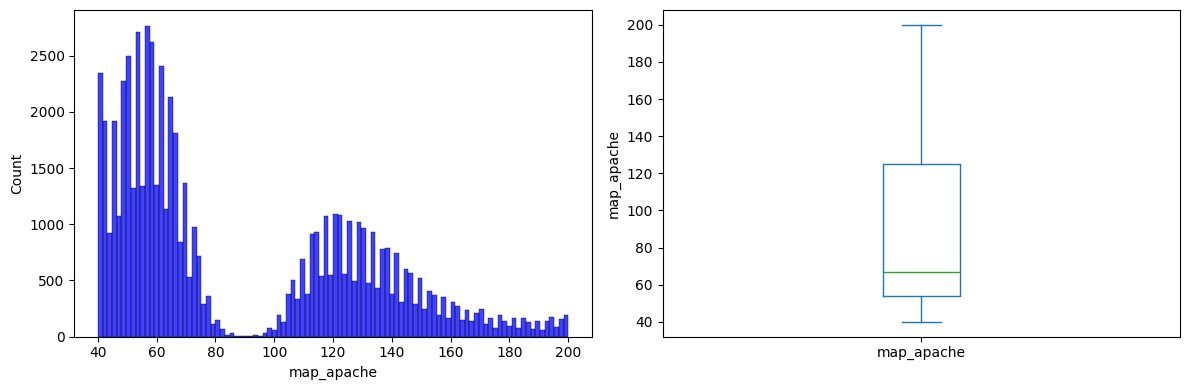

In [548]:
histograma("map_apache",dados)

* No gráfico univariado e na distribuição de frequência abaixo de temperatura percebemos uma grande concentração entre 36 e 37 e varios pontos aberrantes tanto para baixo quanto para cima.  
A temperatura esperade tanto para pacientes idosos quanto pelo ministério da saúde é entre 36,1ºC e 37,2ºC.  
Portnato, vemos que a maioria dos pacientes estão com temperaturas consideradas normais.

* Na análise do gráfico bivariado abaixo de pressão arterial obtemos melhores informações, no gráfico boxplot ainda não há pontos aberrantes no entanto vemos que os pacientes que vieram a obito possuem pressão arterial menos elevada em comparação as pessoas que não vieram a obito.  
Os pacientes que morreram possuem 6 pontos de media menor.  
No gráfico à direita vemos que pacientes que tem pressão arterial entre 75 e 115 possuem uma baixa probabilidade de morte  enquanto valores diferente destes estão preenchendo todo o gráfico.

map_apache                                                 \
                    count       mean        std   min   25%   50%    75%   
hospital_death                                                             
0                 58036.0  88.649648  41.466745  40.0  55.0  67.0  124.0   
1                  5450.0  82.393578  47.850038  40.0  45.0  57.0  128.0   

                       
                  max  
hospital_death         
0               200.0  
1               200.0

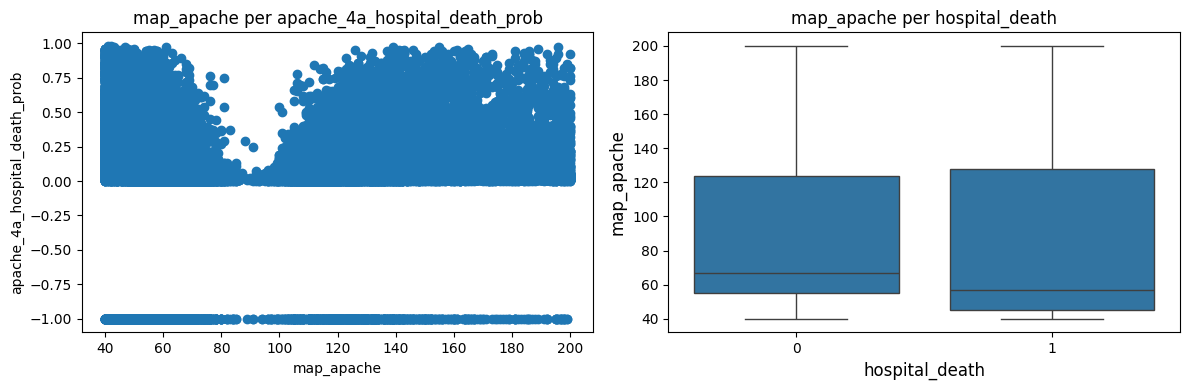

In [549]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("map_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("map_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

<bound method NDFrame.head of      temp_apache  Frequência
0          36.40    0.106361
1          36.60    0.096920
2          36.70    0.093219
3          36.30    0.075071
4          36.50    0.070766
5          36.80    0.065532
6          36.20    0.054901
7          36.10    0.053531
8          36.90    0.042329
9          36.00    0.031942
10         35.90    0.025453
11         37.00    0.023985
12         35.80    0.023627
13         37.10    0.022942
14         35.60    0.018670
15         37.20    0.017333
16         35.70    0.016126
17         37.30    0.009213
18         35.40    0.007761
19         37.40    0.006604
20         35.50    0.006261
21         35.30    0.006049
22         32.10    0.005756
23         35.20    0.005169
24         39.70    0.004305
25         35.00    0.004027
26         36.44    0.003897
27         35.10    0.003864
28         37.50    0.003799
29         36.55    0.003587
30         37.60    0.003522
31         36.38    0.003392
32         36

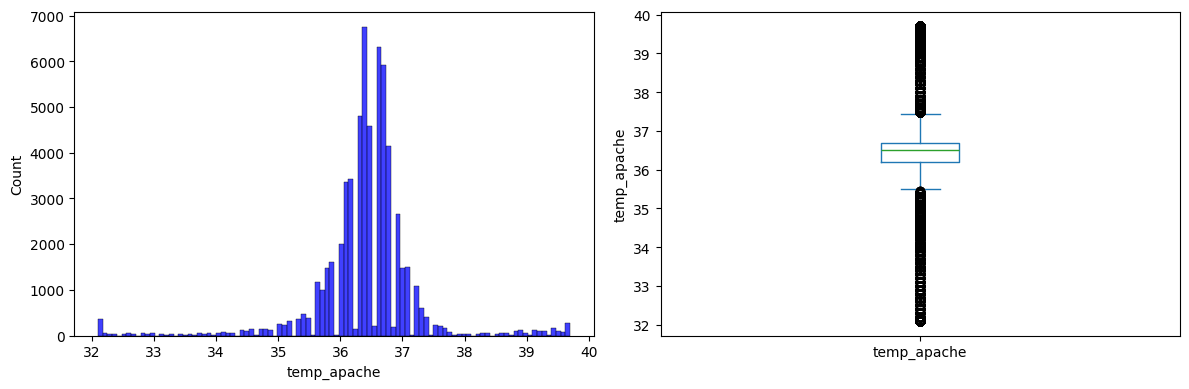

In [550]:
histograma("temp_apache",dados)

* No gráfico univariado e na distribuição de frequência abaixo de frequêcia respiratoria percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40.  
Observamos tambem que no gráfico boxplot não há pontos aberrantes.  
A frequência respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.  
Portanto, pelos gráficos obtidos vemos que a os pacientes que possuem valores considerados normais é bem pequena, e que a maioria doos pacientes estão concetrados  em intervalos com valores abaixo do normal ou acima do normal.

* Na análise do gráfico bivariado abaixo de temperatura percebemos que os pacientes que vieram a obito tem valores de média abaixo do nivel de referência sendo uma temperatura considerada baixa.  
Também percebemos que o boxplot daqueles que morreram é mais cheio e tem pontos aberrantes mais distantes, mo boxplot daqueles que não vieram a obito há maior diversidade de pontos aberrantes.  
No gráfico de disperssão vemos que pacientes com temperatura elevadas como 38 a 39 possuem menor probabilidade de morrer.

temp_apache                                                  
                     count       mean      std   min   25%   50%   75%   max
hospital_death                                                              
0                  56199.0  36.453325  0.74005  32.1  36.2  36.5  36.7  39.7
1                   5130.0  35.990957  1.44767  32.1  35.6  36.3  36.7  39.7

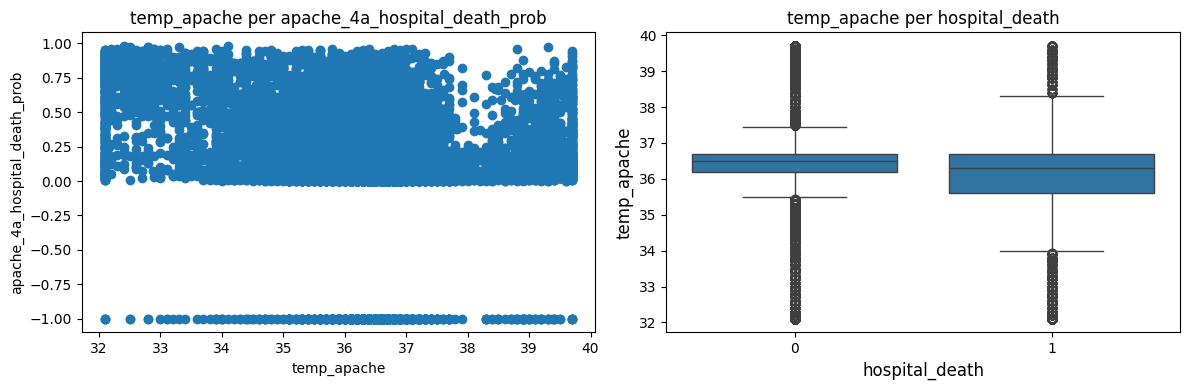

In [551]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("temp_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("temp_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* No gráfico univariado e na distribuição de frequência abaixo de frequêcia respiratoria percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40.  
Observamos tambem que no gráfico boxplot não há pontos aberrantes.  
A frequência respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.  
Portanto, pelos gráficos obtidos vemos que a os pacientes que possuem valores considerados normais é bem pequena, e que a maioria doos pacientes estão concetrados  em intervalos com valores abaixo do normal ou acima do normal.


<bound method NDFrame.head of     resprate_apache  Frequência
0              10.0    0.046992
1              12.0    0.046281
2              11.0    0.043991
3               4.0    0.039220
4               9.0    0.037388
5              28.0    0.034655
6              30.0    0.034624
7               8.0    0.032097
8              29.0    0.031891
9              31.0    0.030012
10             32.0    0.029648
11             33.0    0.028764
12             27.0    0.028764
13             35.0    0.027026
14             34.0    0.026963
15              7.0    0.026426
16             13.0    0.026015
17             36.0    0.025162
18             26.0    0.024104
19              5.0    0.023251
20              6.0    0.023188
21             14.0    0.021703
22             38.0    0.020376
23             37.0    0.020297
24             39.0    0.018275
25             25.0    0.016664
26             40.0    0.016017
27             41.0    0.015432
28             16.0    0.013900
29        

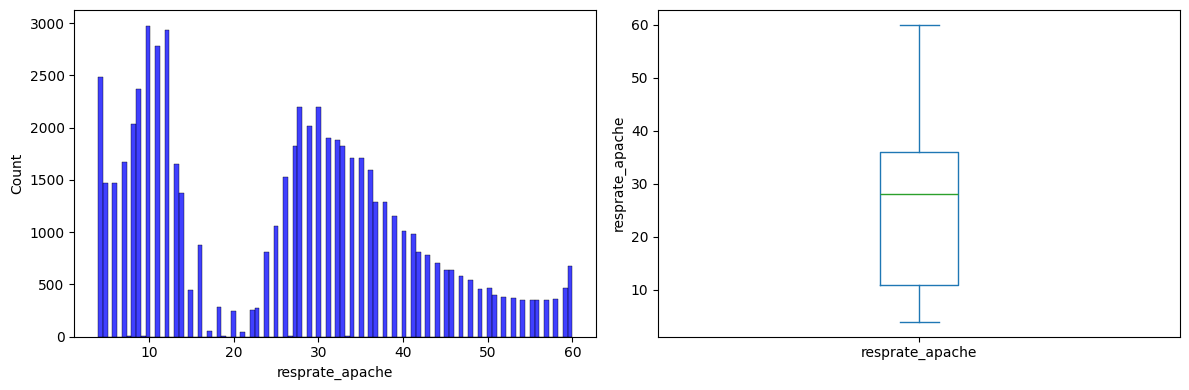

In [552]:
histograma("resprate_apache",dados)

* No gráfico bivariado abaixo de frequência respiratoria percebemos pela média que a frequência respiratoria media dos pacientes que vieram a obito é bem maior do que a esperada nos dois valores de referência.  
Vemos no gráfico boxplot que o quartil daqueles que morreram esta mais acima daqueles que permaneceram vivos, nos mostrando a alta frequência respiratoria daqueles que morreram.
Não há pontos aberrantes em nenhum dos dois boxplots.  
No gráfico de dispersão tambem observamo um buraco no gráfico, pacientes com valores entre 18 e 24 tem menor probabilidade de morrer enquanto o restante dos valores preenchem o gráfico quase que completamente.


pre_icu_los_days                                           \
                          count      mean       std        min       25%   
hospital_death                                                             
0                       58659.0  0.788503  2.410658 -11.409722  0.035417   
1                        5540.0  1.369714  3.468253 -13.775000  0.036806   

                                                
                     50%       75%         max  
hospital_death                                  
0               0.137500  0.395139  159.090972  
1               0.143056  0.827951   63.827083

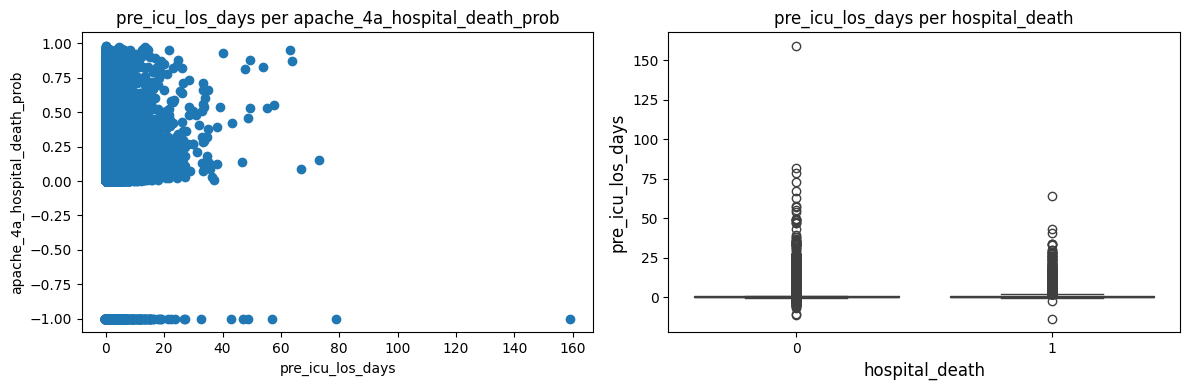

In [553]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("pre_icu_los_days","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("pre_icu_los_days","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

# Tratamento nos dados

## Pre-processamento

In [554]:
quali_var = ['gender',
'icu_admit_source',
'leukemia',
'diabetes_mellitus',
'solid_tumor_with_metastasis',
'cirrhosis',
'hepatic_failure',
'immunosuppression',
'ventilated_apache',
'intubated_apache']
quant_var = ['heart_rate_apache',
'temp_apache',
'resprate_apache',
'map_apache',
'apache_4a_hospital_death_prob']
quanti_Df = dados[quant_var]
quali_Df =dados[quali_var]
treino_dados_y = dados['hospital_death']

In [555]:
from sklearn.impute import SimpleImputer

In [556]:
print("-----------------dados quantitativos antes da imputação----------------")
print("\n")
display(quanti_Df)
print("\n")
print("------------------Descrição dos dados antes da imputação--------------------")
display(quanti_Df.describe())
imputer = SimpleImputer(strategy = "median", add_indicator = True)
imputer.fit(quanti_Df)
print('medianas: ', imputer.statistics_)
print("\n")
print('Colunas que possuem dados faltosos ', imputer.get_feature_names_out())

-----------------dados quantitativos antes da imputação----------------




,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob
0,116.0,36.7,32.0,56.0,0.05
1,129.0,36.7,31.0,54.0,0.11
2,43.0,36.4,27.0,46.0,-1.00
3,139.0,36.9,28.0,178.0,0.09
4,113.0,NaN,41.0,56.0,0.10
...,...,...,...,...,...
64194,104.0,36.8,29.0,73.0,0.01
64195,90.0,36.7,34.0,73.0,0.03
64196,113.0,36.6,6.0,50.0,0.05
64197,83.0,36.0,12.0,63.0,0.09




------------------Descrição dos dados antes da imputação--------------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob
count,63574.000000,61329.000000,63309.000000,63486.000000,58602.000000
mean,99.629739,36.414649,25.823385,88.112592,0.085932
std,30.862527,0.832779,15.115849,42.088844,0.248674
min,30.000000,32.100000,4.000000,40.000000,-1.000000
25%,86.000000,36.200000,11.000000,54.000000,0.020000
50%,104.000000,36.500000,28.000000,67.000000,0.050000
75%,120.000000,36.700000,36.000000,125.000000,0.130000
max,178.000000,39.700000,60.000000,200.000000,0.980000


medianas:  [1.04e+02 3.65e+01 2.80e+01 6.70e+01 5.00e-02]


Colunas que possuem dados faltosos  ['heart_rate_apache' 'temp_apache' 'resprate_apache' 'map_apache'
 'apache_4a_hospital_death_prob' 'missingindicator_heart_rate_apache'
 'missingindicator_temp_apache' 'missingindicator_resprate_apache'
 'missingindicator_map_apache'
 'missingindicator_apache_4a_hospital_death_prob']


In [557]:
#trocar pra quanti transformados
quanti_Df = pd.DataFrame(imputer.transform(quanti_Df), columns= imputer.get_feature_names_out())
('Nome das colunas: ', imputer.get_feature_names_out())
print("-------------------Apos a imputação pela mediana--------------------")
print("\n")
display(quanti_Df.head())
print("\n")
print("------------------Descrição dos dados apos a imputação--------------------")
display(quanti_Df.describe())


-------------------Apos a imputação pela mediana--------------------




,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,116.0,36.7,32.0,56.0,0.05,0.0,0.0,0.0,0.0,0.0
1,129.0,36.7,31.0,54.0,0.11,0.0,0.0,0.0,0.0,0.0
2,43.0,36.4,27.0,46.0,-1.00,0.0,0.0,0.0,0.0,0.0
3,139.0,36.9,28.0,178.0,0.09,0.0,0.0,0.0,0.0,0.0
4,113.0,36.5,41.0,56.0,0.10,0.0,1.0,0.0,0.0,0.0




------------------Descrição dos dados apos a imputação--------------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
count,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000
mean,99.672285,36.418465,25.853560,87.878113,0.082799,0.009735,0.044705,0.013863,0.011106,0.087182
std,30.714926,0.814142,15.012862,41.912909,0.237803,0.098187,0.206656,0.116924,0.104799,0.282104
min,30.000000,32.100000,4.000000,40.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,36.200000,11.000000,54.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,36.500000,28.000000,67.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,36.700000,36.000000,124.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000
max,178.000000,39.700000,60.000000,200.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000


## Padronização dos dados quantitativos

In [558]:
from sklearn.preprocessing import StandardScaler#, MinMaxScaler
scaler = StandardScaler() #MinMaxScaler(feature_range  = (.4, .6))
scaler.fit(quanti_Df)
quanti_Df = pd.DataFrame(scaler.transform(quanti_Df), columns= scaler.get_feature_names_out())
print("---------------Dados apos a padronização-----------------")
display(quanti_Df.head())
print("---------------Descrição dos dados apos a padronização-----------------")
display(quanti_Df.describe())

---------------Dados apos a padronização-----------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045


---------------Descrição dos dados apos a padronização-----------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
count,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04
mean,-2.127234e-16,-6.867912e-15,-5.423230e-18,1.593766e-17,-9.496186e-17,1.914732e-17,9.651136e-17,2.257835e-17,-2.335309e-17,-1.261731e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.268370e+00,-5.304353e+00,-1.455667e+00,-1.142333e+00,-4.553382e+00,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
25%,-4.125806e-01,-2.683396e-01,-9.893966e-01,-8.083041e-01,-2.640838e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
50%,1.409005e-01,1.001492e-01,1.429745e-01,-4.981347e-01,-1.379279e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
75%,6.618240e-01,3.458084e-01,6.758551e-01,8.618387e-01,1.564357e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
max,2.550171e+00,4.030696e+00,2.274497e+00,2.675137e+00,3.772903e+00,1.008555e+01,4.622660e+00,8.434080e+00,9.436137e+00,3.235777e+00


## One hot encoding para as variaveis qualitativas

In [559]:
from sklearn.preprocessing import OneHotEncoder
codificador_qualitativas = OneHotEncoder() 
OHE_quali= codificador_qualitativas.fit_transform(quali_Df)
# (quali_encoder_1hot)

In [560]:
print('[] quali_encoder_1hot.toarray(): \n', OHE_quali.toarray())
print("\n")
print('[] quali_encoder.categories_: \n', codificador_qualitativas.categories_)
print("\n")
print('[] quali_encoder.get_feature_names_out(): \n', codificador_qualitativas.get_feature_names_out())

[] quali_encoder_1hot.toarray(): 
 [[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


[] quali_encoder.categories_: 
 [array(['F', 'M', nan], dtype=object), array(['Accident & Emergency', 'Floor', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU', nan], dtype=object), array([ 0.,  1., nan]), array([ 0.,  1., nan]), array([ 0.,  1., nan]), array([ 0.,  1., nan]), array([ 0.,  1., nan]), array([ 0.,  1., nan]), array([ 0.,  1., nan]), array([ 0.,  1., nan])]


[] quali_encoder.get_feature_names_out(): 
 ['gender_F' 'gender_M' 'gender_nan'
 'icu_admit_source_Accident & Emergency' 'icu_admit_source_Floor'
 'icu_admit_source_Operating Room / Recovery'
 'icu_admit_source_Other Hospital' 'icu_admit_source_Other ICU'
 'icu_admit_source_nan' 'leukemia_0.0' 'leukemia_1.0' 'leukemia_nan'
 'diabetes_mellitus_0.0' 'diabetes_mellitus_1.0' 'diabetes_mellitus_nan'
 'solid_tumor_wi

In [561]:
quali_ohe_df = pd.DataFrame(OHE_quali.toarray(), columns=codificador_qualitativas.get_feature_names_out())
print("-----------------Dados qualitativos antes do OHE-----------------")
quali_Df.head(5)


-----------------Dados qualitativos antes do OHE-----------------


,gender,icu_admit_source,leukemia,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,hepatic_failure,immunosuppression,ventilated_apache,intubated_apache
0,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,M,Accident & Emergency,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,M,Floor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [562]:
print("-----------------Dados qualitativos apos do OHE-----------------")
quali_ohe_df.head(5)

-----------------Dados qualitativos apos do OHE-----------------


,gender_F,gender_M,gender_nan,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_admit_source_nan,leukemia_0.0,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [563]:
trainOk = pd.concat([quanti_Df, quali_ohe_df], axis=1)
trainOk.head()

,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Divisão conjunto de dados

In [564]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler#, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
 
quantiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "median", add_indicator = True)), 
                           ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))
qualiPipeline = Pipeline([('ohe', OneHotEncoder(sparse_output = False)), 
                           ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))

In [565]:
quantiOk = pd.DataFrame(quantiPipeline.fit_transform(quanti_Df), 
                        columns=quantiPipeline.get_feature_names_out())
quantiOk.head()

,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045


In [566]:
qualiOk = pd.DataFrame(qualiPipeline.fit_transform(quali_Df), 
    columns=qualiPipeline.get_feature_names_out())
qualiOk.head()

,gender_F,gender_M,gender_nan,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_admit_source_nan,leukemia_0.0,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,1.081455,-1.080980,-0.014769,0.833358,-0.453048,-0.505014,-0.161302,-0.098991,-0.035762,0.122883,...,-0.089662,0.187039,-0.162821,-0.089662,0.703723,-0.691090,-0.089662,0.434162,-0.421114,-0.089662
1,1.081455,-1.080980,-0.014769,0.833358,-0.453048,-0.505014,-0.161302,-0.098991,-0.035762,0.122883,...,-0.089662,0.187039,-0.162821,-0.089662,-1.421015,1.446989,-0.089662,-2.303290,2.374655,-0.089662
2,-0.924680,0.925086,-0.014769,0.833358,-0.453048,-0.505014,-0.161302,-0.098991,-0.035762,0.122883,...,-0.089662,0.187039,-0.162821,-0.089662,0.703723,-0.691090,-0.089662,0.434162,-0.421114,-0.089662
3,-0.924680,0.925086,-0.014769,-1.199964,2.207270,-0.505014,-0.161302,-0.098991,-0.035762,0.122883,...,-0.089662,0.187039,-0.162821,-0.089662,0.703723,-0.691090,-0.089662,0.434162,-0.421114,-0.089662
4,1.081455,-1.080980,-0.014769,0.833358,-0.453048,-0.505014,-0.161302,-0.098991,-0.035762,0.122883,...,-0.089662,0.187039,-0.162821,-0.089662,-1.421015,1.446989,-0.089662,0.434162,-0.421114,-0.089662


In [567]:
from sklearn.compose import ColumnTransformer
fullPipeline = ColumnTransformer([("qt", quantiPipeline, quant_var), 
                                  ("ql", qualiPipeline, quali_var)]) 
fullPipeline

ColumnTransformer(transformers=[('qt',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['heart_rate_apache', 'temp_apache',
                                  'resprate_apache', 'map_apache',
                                  'apache_4a_hospital_death_prob']),
                                ('ql',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['gender', 'icu_admit_source', 'leukemia',
                                  'diabetes_mellitus',
                                  'solid_tumor_with_metastasis', 'cirrhosis',
                                  'hepatic_failure', 'immunosuppression',
                                  'ventilated_apache', 'intubated_apache'])])

In [568]:
from sklearn.model_selection import train_test_split

proporcao_treino = 0.70
proporcao_validacao = 0.15
proporcao_teste = 0.15

dados_treino, temp = train_test_split(dados, test_size=(1 - proporcao_treino), random_state=2)
dados_validacao, dados_teste = train_test_split(temp, test_size=proporcao_teste / (proporcao_validacao + proporcao_teste), random_state=2)

In [569]:
print("Tamanho do conjunto de treinamento:", len(dados_treino))
print("Tamanho do conjunto de validação:", len(dados_validacao))
print("Tamanho do conjunto de teste:", len(dados_teste))

Tamanho do conjunto de treinamento: 44939
Tamanho do conjunto de validação: 9630
Tamanho do conjunto de teste: 9630


In [570]:
dados['hospital_death'].value_counts()

hospital_death
0    58659
1     5540
Name: count, dtype: int64

In [571]:
dados_treino['hospital_death'].value_counts()

hospital_death
0    41118
1     3821
Name: count, dtype: int64

In [572]:
#display(dados)
y_train = dados_treino['hospital_death']
y_test = dados_teste['hospital_death']
y_val = dados_validacao['hospital_death']



In [573]:
x_val = fullPipeline.fit_transform(dados_validacao)
x_teste = fullPipeline.fit_transform(dados_teste)
x_train = fullPipeline.fit_transform(dados_treino)

In [574]:
pd.DataFrame(x_train, columns=fullPipeline.get_feature_names_out())

,qt__heart_rate_apache,qt__temp_apache,qt__resprate_apache,qt__map_apache,qt__apache_4a_hospital_death_prob,qt__missingindicator_heart_rate_apache,qt__missingindicator_temp_apache,qt__missingindicator_resprate_apache,qt__missingindicator_map_apache,qt__missingindicator_apache_4a_hospital_death_prob,...,ql__hepatic_failure_nan,ql__immunosuppression_0.0,ql__immunosuppression_1.0,ql__immunosuppression_nan,ql__ventilated_apache_0.0,ql__ventilated_apache_1.0,ql__ventilated_apache_nan,ql__intubated_apache_0.0,ql__intubated_apache_1.0,ql__intubated_apache_nan
0,0.401475,-0.514631,-1.388487,1.616736,0.451445,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,-1.419731,1.445931,-0.090115,-2.303358,2.375472,-0.090115
1,-1.740907,-3.718158,-1.255529,-1.119691,-0.139192,-0.099209,-0.215593,-0.119049,-0.106501,3.234363,...,-0.090115,0.187867,-0.163497,-0.090115,0.704359,-0.691596,-0.090115,0.434149,-0.420969,-0.090115
2,-1.935669,0.347858,-1.056093,2.401972,-0.181380,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,0.704359,-0.691596,-0.090115,0.434149,-0.420969,-0.090115
3,0.498856,0.101432,0.339963,1.069451,-0.139192,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,0.704359,-0.691596,-0.090115,0.434149,-0.420969,-0.090115
4,1.277904,-0.514631,1.603061,-0.929330,2.307734,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,-1.419731,1.445931,-0.090115,-2.303358,2.375472,-0.090115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44934,-0.312653,0.471070,0.539399,-0.667585,-0.265757,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,-1.419731,1.445931,-0.090115,0.434149,-0.420969,-0.090115
44935,1.829729,-0.144993,2.267849,1.069451,0.999894,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,-1.419731,1.445931,-0.090115,0.434149,-0.420969,-0.090115
44936,0.693618,-0.637843,0.339963,1.188426,0.535822,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,0.704359,-0.691596,-0.090115,0.434149,-0.420969,-0.090115
44937,0.011951,-0.761056,0.539399,2.068842,-0.307945,-0.099209,-0.215593,-0.119049,-0.106501,-0.309180,...,-0.090115,0.187867,-0.163497,-0.090115,0.704359,-0.691596,-0.090115,0.434149,-0.420969,-0.090115


# Modelos

In [575]:
def Feature_Coefficient_Model_fig(model):
    if(model == lin_reg):   
        fig, ax = plt.subplots(figsize=(12, 8))
        fig = pd.DataFrame(data=model.coef_,
                    index=fullPipeline.get_feature_names_out(), 
                    columns=['coefficient'])
        fig.sort_values(by=['coefficient']).plot(kind='barh', title=f'Feature coefficient {model}',ax=ax)
        plt.show()
    if (model == log_reg):
        fig, ax = plt.subplots(figsize=(12, 8))
        fig = pd.DataFrame(data=model.coef_.flatten(),
                index=fullPipeline.get_feature_names_out(), 
                columns=['coefficient'])
        fig.sort_values(by=['coefficient']).plot(kind='barh', title=f'Feature coefficient {model}',ax=ax)
        plt.show()
    if (model == tree_reg):
        fig, ax = plt.subplots(figsize=(12, 8))
        fig = pd.DataFrame(data=model.feature_importances_,
                index=fullPipeline.get_feature_names_out(), 
                columns=['importance'])
        fig.sort_values(by=['importance']).plot(kind='barh', title=f'Feature importance {model}',ax=ax)
        plt.show()

In [576]:
def Feature_Coefficient_Model(model):
    if(model == lin_reg):   
        fig, ax = plt.subplots(figsize=(12, 8))
        fig = pd.DataFrame(data=model.coef_,
                    index=fullPipeline.get_feature_names_out(), 
                    columns=['coefficient'])
        fig.sort_values(by=['coefficient']).plot(kind='barh', title=f'Feature coefficient {model}',ax=ax)
        return fig
    else:
        fig, ax = plt.subplots(figsize=(12, 8))
        fig = pd.DataFrame(data=model.coef_.flatten(),
                index=fullPipeline.get_feature_names_out(), 
                columns=['coefficient'])
        fig.sort_values(by=['coefficient']).plot(kind='barh', title=f'Feature coefficient {model}',ax=ax)
        return fig

In [577]:
def dropColumn(data, columns):
    data.drop(columns, axis=1, inplace=True)

In [578]:
def Plot_pred_train(y_pred, y_train):  
    y_predict = y_pred[:100]
    y_trained = y_train[:100]
    eixo_x = range(len(y_predict))  # Supondo um eixo X baseado no índice dos dados
    # Criando o gráfico
    plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
    plt.plot(eixo_x,y_trained, label='Dados Originais', color='blue', marker='o')  # Plotando os dados originais
    plt.plot(eixo_x,y_predict, label='Previsão', color='red', marker='x')  # Plotando a previsão em vermelho

    # Adicionando títulos e rótulos
    plt.title('Comparação entre Previsão e Dados Originais')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.legend()  # Adiciona legenda

    # Exibindo o gráfico
    plt.show()


In [579]:
def count_values_death(y_pred):   
    n_vivos,n_obitos=y_train.value_counts()
    print("-----------------Valores no treinamento------------------")
    print("numero de mortes nos dados de treino:",n_obitos)
    print("numero de pacientes vivos nos dados de treino:",n_vivos)
    count_0 = 0
    count_1 = 0
    for i in range (len(x_train)):
        
        if y_pred[i]> 0.5:
            count_0 = count_0+1
        else:
            count_1+=1 
    print("\n")         
    print("-----------------Valores no modelo------------------") 
    print("numero de pacientes vivos no modelo:",count_0)
    print("numero de mortes no modelo:",count_1)

In [580]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
def printPerformanceMeasures(model, y_true, y_pred):
    print(type(model).__name__, ' ACCURACY = ', accuracy_score(y_true = y_true, y_pred = y_pred))#.values[1])
    print(type(model).__name__, ' RMSE = ', mean_squared_error(y_true = y_true, y_pred = y_pred, squared=False))#.values[1])
    print(type(model).__name__, ' MAE = ', mean_absolute_error(y_true = y_true, y_pred = y_pred))#.values[1])

## Linear regression

In [581]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lin_reg = LinearRegression() 
lin_reg.fit(x_train,y_train)

LinearRegression()

In [582]:

some_labels = y_train
y_pred = [y_p for y_p in lin_reg.predict(x_train)]
some_cases = pd.DataFrame({'hospital_death': some_labels, 'linear reg prediction': y_pred})
some_cases.head()


,hospital_death,linear reg prediction
53328,0,0.171570
4767,0,0.103442
2162,0,-0.076657
8407,0,0.063632
43250,1,0.413727


In [583]:
#evaluation measures
predicao_de_y = [round(y_hat) for y_hat in y_pred]
printPerformanceMeasures(model= lin_reg, y_true=y_train, y_pred=predicao_de_y)
# print('lin_reg.coef_: \n', lin_reg.coef_)

"""
eixo x = previsao 
eixo y = dado orignal"""
"""grafico igual o de diego e
separar o conjunto de dados"""
'''modelo ta acertando pq o povo não morre'''

LinearRegression  ACCURACY =  0.9169095885533723
LinearRegression  RMSE =  0.2882540744666546
LinearRegression  MAE =  0.08309041144662765


'modelo ta acertando pq o povo não morre'

#scatter

In [584]:
count_values_death(y_pred)

-----------------Valores no treinamento------------------
numero de mortes nos dados de treino: 3821
numero de pacientes vivos nos dados de treino: 41118


-----------------Valores no modelo------------------
numero de pacientes vivos no modelo: 217
numero de mortes no modelo: 44722


## Regressão logisitica

### modelo orginal

In [585]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.5) 
log_reg.fit(x_train, y_train)#.values.ravel())
#evaluation measures

LogisticRegression(C=1.5)

função pickle


In [586]:
y_pred = [y_p for y_p in log_reg.predict(x_train)]
some_cases = pd.DataFrame({'hospital_death': y_train, 'log reg prediction': y_pred})
some_cases.head()

,hospital_death,log reg prediction
53328,0,0
4767,0,0
2162,0,0
8407,0,0
43250,1,1


In [587]:

y_train_predictions = [round(y_hat) for y_hat in y_pred]
printPerformanceMeasures(model= log_reg, y_true=y_train, y_pred=y_train_predictions)

LogisticRegression  ACCURACY =  0.9214713277999066
LogisticRegression  RMSE =  0.2802296775862497
LogisticRegression  MAE =  0.07852867220009346


matriz de confusão

<Axes: title={'center': 'Feature coefficient LogisticRegression(C=1.5)'}>

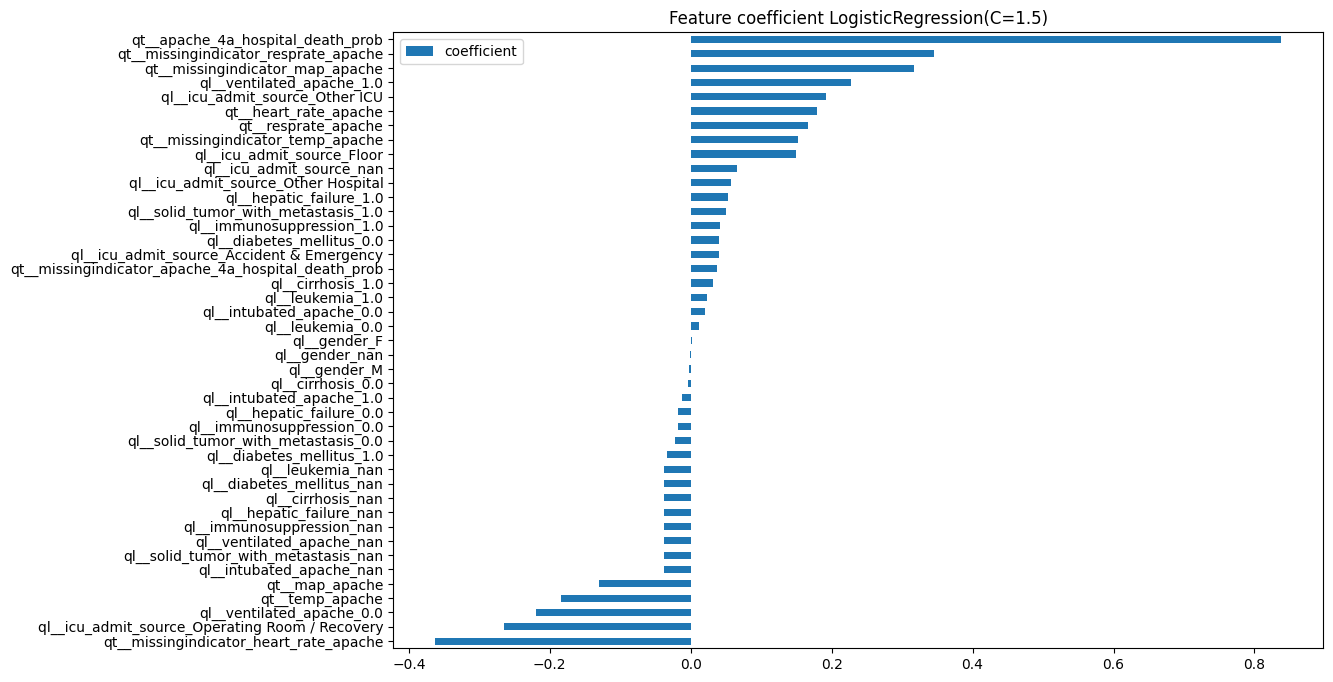

In [588]:
model = log_reg
fig, ax = plt.subplots(figsize=(12, 8))
fig = pd.DataFrame(data=model.coef_.flatten(),
index=fullPipeline.get_feature_names_out(), 
columns=['coefficient'])
fig.sort_values(by=['coefficient']).plot(kind='barh', title=f'Feature coefficient {model}',ax=ax)

In [589]:

# Obtendo os nomes das variáveis correspondentes
selected_feature_names_menor = fig[(fig['coefficient'] <= -0.2)]
selected_feature_names_maior= fig[(fig['coefficient'] >= 0.2)].index.values
# Exibindo os coeficientes e seus nomes
for feature in zip(selected_feature_names_maior):
    print(f"Feature: {feature}")
for feature in zip(selected_feature_names_menor):
    print(f"Feature: {feature}")    



Feature: ('qt__apache_4a_hospital_death_prob',)
Feature: ('qt__missingindicator_resprate_apache',)
Feature: ('qt__missingindicator_map_apache',)
Feature: ('ql__ventilated_apache_1.0',)
Feature: ('coefficient',)


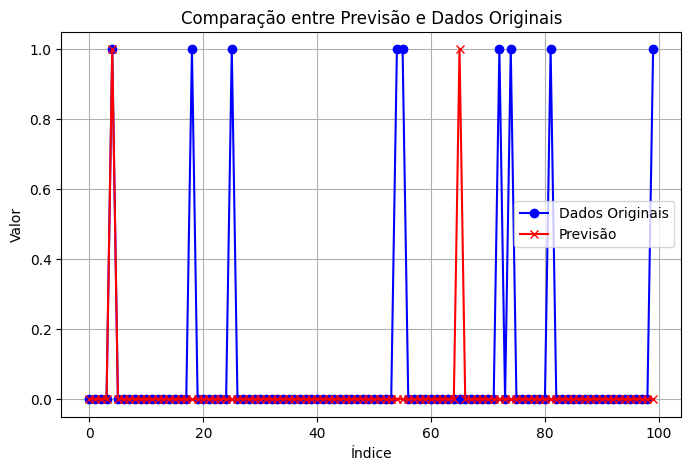

In [590]:
Plot_pred_train(y_pred, y_train)

sensibilidade do modelo (olhar)

In [591]:
count_values_death(y_pred=y_pred)

-----------------Valores no treinamento------------------
numero de mortes nos dados de treino: 3821
numero de pacientes vivos nos dados de treino: 41118


-----------------Valores no modelo------------------
numero de pacientes vivos no modelo: 1198
numero de mortes no modelo: 43741


### Modelo ajustado

In [592]:
# Suponha que 'fullPipeline' seja um objeto Pipeline que inclui pré-processamento e o modelo
# e 'log_reg' seja o modelo de regressão logística treinado.

# Cria um DataFrame com os coeficientes e os nomes das características
coef_df = pd.DataFrame(data=log_reg.coef_.flatten(), index=fullPipeline.get_feature_names_out(), columns=['coeficiente'])

# Ordena o DataFrame pelos valores absolutos dos coeficientes em ordem decrescente
coef_df['coef_abs'] = coef_df['coeficiente'].abs()
coef_df_sorted = coef_df.sort_values(by='coef_abs', ascending=False)

# Define os limites para selecionar as características importantes
limite_superior = 0.05
limite_inferior = -0.05

# Seleciona as características com coeficientes acima do limite superior ou abaixo do limite inferior
caracteristicas_importantes = coef_df_sorted[(coef_df_sorted['coef_abs'] > limite_superior) | (coef_df_sorted['coef_abs'] < limite_inferior)].index.tolist()

# Imprime as características importantes
print("Características importantes:")
print(caracteristicas_importantes)


['qt__apache_4a_hospital_death_prob', 'qt__missingindicator_heart_rate_apache', 'qt__missingindicator_resprate_apache', 'qt__missingindicator_map_apache', 'ql__icu_admit_source_Operating Room / Recovery', 'ql__ventilated_apache_1.0', 'ql__ventilated_apache_0.0', 'ql__icu_admit_source_Other ICU', 'qt__temp_apache', 'qt__heart_rate_apache', 'qt__resprate_apache', 'qt__missingindicator_temp_apache', 'ql__icu_admit_source_Floor', 'qt__map_apache', 'ql__icu_admit_source_nan', 'ql__icu_admit_source_Other Hospital', 'ql__hepatic_failure_1.0', 'ql__solid_tumor_with_metastasis_1.0']



Características importantes:
['qt__apache_4a_hospital_death_prob', 'qt__missingindicator_heart_rate_apache', 'qt__missingindicator_resprate_apache', 'qt__missingindicator_map_apache', 'ql__icu_admit_source_Operating Room / Recovery', 'ql__ventilated_apache_1.0', 'ql__ventilated_apache_0.0', 'ql__icu_admit_source_Other ICU', 'qt__temp_apache', 'qt__heart_rate_apache', 'qt__resprate_apache', 'qt__missingindicator_temp_apache', 'ql__icu_admit_source_Floor', 'qt__map_apache', 'ql__icu_admit_source_nan', 'ql__icu_admit_source_Other Hospital', 'ql__hepatic_failure_1.0', 'ql__solid_tumor_with_metastasis_1.0']


['qt__apache_4a_hospital_death_prob',
 'qt__missingindicator_heart_rate_apache',
 'qt__missingindicator_resprate_apache',
 'qt__missingindicator_map_apache',
 'ql__icu_admit_source_Operating Room / Recovery',
 'ql__ventilated_apache_1.0',
 'ql__ventilated_apache_0.0',
 'ql__icu_admit_source_Other ICU',
 'qt__temp_apache',
 'qt__heart_rate_apache',
 'qt__resprate_apache',
 'qt__missingindicator_temp_apache',
 'ql__icu_admit_source_Floor',
 'qt__map_apache',
 'ql__icu_admit_source_nan',
 'ql__icu_admit_source_Other Hospital',
 'ql__hepatic_failure_1.0',
 'ql__solid_tumor_with_metastasis_1.0']

In [593]:

# Suponha que x_train seja o seu numpy.ndarray
# Você pode criar um DataFrame a partir dele
x_train_df = pd.DataFrame(x_train, columns=fullPipeline.get_feature_names_out())

#Suponha que x_train_df seja o seu DataFrame
# Mantenha apenas as colunas 1 e 2
x_train_df = x_train_df[['qt__apache_4a_hospital_death_prob', 'qt__missingindicator_heart_rate_apache', 'qt__missingindicator_resprate_apache', 'qt__missingindicator_map_apache', 'ql__icu_admit_source_Operating Room / Recovery', 'ql__ventilated_apache_1.0', 'ql__ventilated_apache_0.0', 'ql__icu_admit_source_Other ICU', 'qt__temp_apache', 'qt__heart_rate_apache', 'qt__resprate_apache', 'qt__missingindicator_temp_apache', 'ql__icu_admit_source_Floor', 'qt__map_apache', 'ql__icu_admit_source_nan', 'ql__icu_admit_source_Other Hospital', 'ql__hepatic_failure_1.0', 'ql__solid_tumor_with_metastasis_1.0']]

x_train_log= x_train_df.to_numpy()


In [594]:
'''l1 =para muitos dados =0'''
#saga funciona bem com o l1
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga',class_weight={0: 1, 1: 3}) 
log_reg.fit(x_train_log, y_train)#.values.ravel())

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.5, class_weight={0: 1, 1: 3}, penalty='l1',
                   solver='saga')

In [595]:
y_pred = [y_p for y_p in log_reg.predict(x_train_log)]
some_cases = pd.DataFrame({'hospital_death': y_train, 'log reg prediction': y_pred})
some_cases.head()
y_train_predictions = [round(y_hat) for y_hat in y_pred]
printPerformanceMeasures(model= log_reg, y_true=y_train, y_pred=y_train_predictions)

LogisticRegression  ACCURACY =  0.9057388904960056
LogisticRegression  RMSE =  0.3070197216857482
LogisticRegression  MAE =  0.0942611095039943


Matriz de Confusão:
 [[39168  1950]
 [ 2286  1535]]


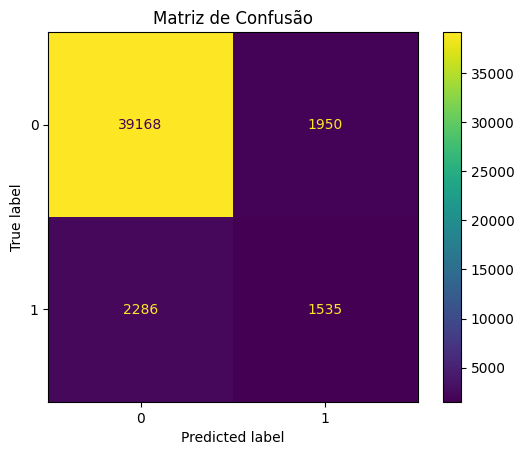

In [596]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.title('Matriz de Confusão')
plt.show()

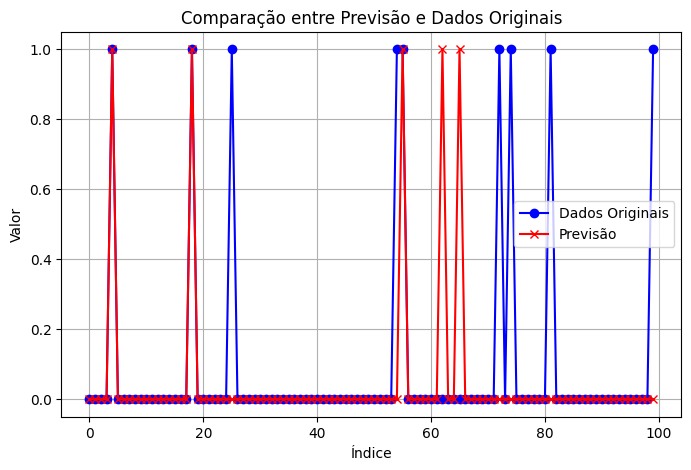

In [597]:
Plot_pred_train(y_pred, y_train)

In [598]:
count_values_death(y_pred=y_pred)

-----------------Valores no treinamento------------------
numero de mortes nos dados de treino: 3821
numero de pacientes vivos nos dados de treino: 41118


-----------------Valores no modelo------------------
numero de pacientes vivos no modelo: 3485
numero de mortes no modelo: 41454


## Arvore de decisão

### Modelo original

In [599]:
#Concept
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tree_reg = DecisionTreeRegressor(random_state=0, min_samples_split = 10) 
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=10, random_state=0)

In [600]:
y_pred = [y_p for y_p in tree_reg.predict(x_train)]
some_cases = pd.DataFrame({'hospital_death': y_train, 'decision tree prediction': y_pred})
some_cases.head()

,hospital_death,decision tree prediction
53328,0,0.0
4767,0,0.0
2162,0,0.0
8407,0,0.0
43250,1,1.0


In [601]:

y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train)]
printPerformanceMeasures(model= tree_reg, y_true=y_train, y_pred=y_train_predictions)

DecisionTreeRegressor  ACCURACY =  0.9615701283962705
DecisionTreeRegressor  RMSE =  0.1960353835503415
DecisionTreeRegressor  MAE =  0.0384298716037295


Matriz de Confusão:
 [[40695   423]
 [ 1304  2517]]


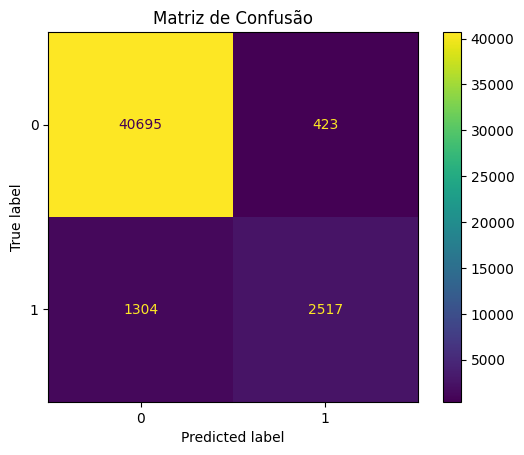

In [602]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_train_predictions)
print("Matriz de Confusão:\n", conf_matrix)

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predictions)
plt.title('Matriz de Confusão')
plt.show()

### Modelo ajustado

<Axes: title={'center': 'Feature importance DecisionTreeRegressor(min_samples_split=10, random_state=0)'}>

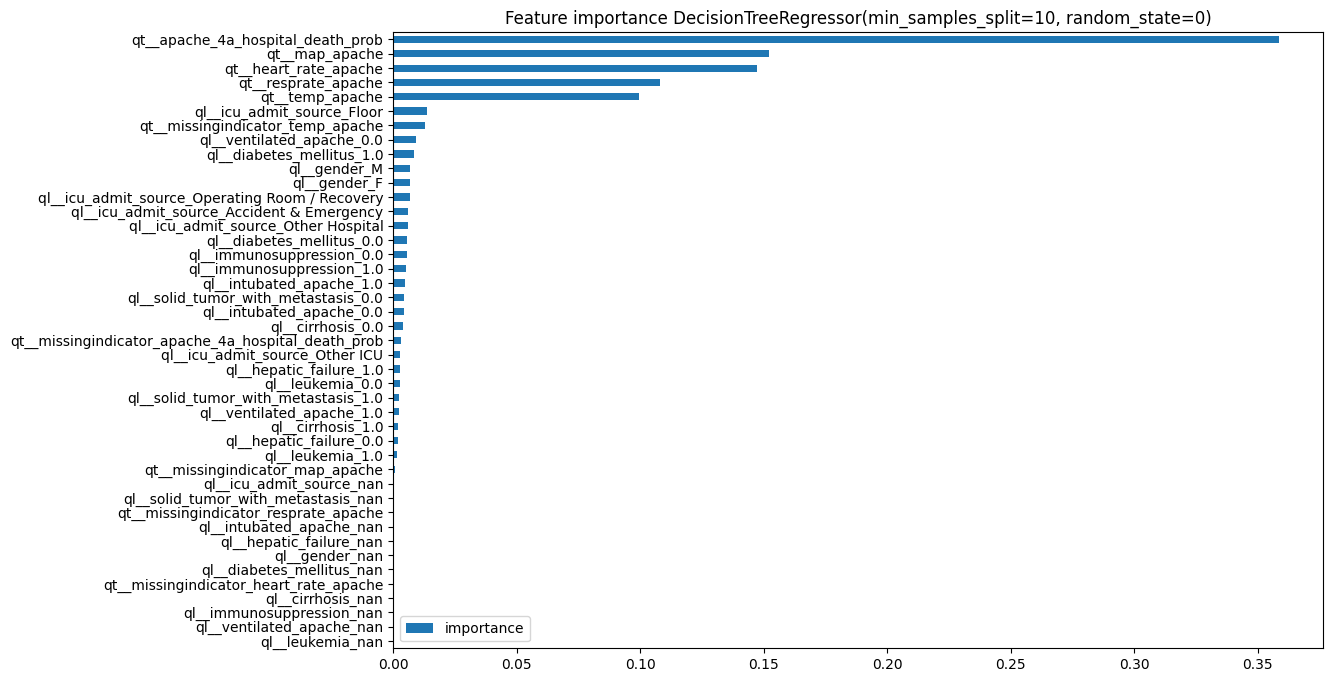

In [603]:
model = tree_reg
fig, ax = plt.subplots(figsize=(12, 8))
fig = pd.DataFrame(data=model.feature_importances_,
index=fullPipeline.get_feature_names_out(), 
columns=['importance'])
fig.sort_values(by=['importance']).plot(kind='barh', title=f'Feature importance {model}',ax=ax)

In [604]:
# Suponha que 'fullPipeline' seja um objeto Pipeline que inclui pré-processamento e o modelo
# e 'log_reg' seja o modelo de regressão logística treinado.
model = tree_reg
# Cria um DataFrame com os coeficientes e os nomes das características
coef_df = pd.DataFrame(data=model.feature_importances_, index=fullPipeline.get_feature_names_out(), columns=['coeficiente'])

# Ordena o DataFrame pelos valores absolutos dos coeficientes em ordem decrescente
coef_df['coef_abs'] = coef_df['coeficiente'].abs()
coef_df_sorted = coef_df.sort_values(by='coef_abs', ascending=False)

# Define os limites para selecionar as características importantes
limite_superior = 0
limite_inferior = -0.05

# Seleciona as características com coeficientes acima do limite superior ou abaixo do limite inferior
caracteristicas_importantes = coef_df_sorted[(coef_df_sorted['coef_abs'] > limite_superior) | (coef_df_sorted['coef_abs'] < limite_inferior)].index.tolist()

# Imprime as características importantes
print("Características importantes:")
print(caracteristicas_importantes)


Características importantes:
['qt__apache_4a_hospital_death_prob', 'qt__map_apache', 'qt__heart_rate_apache', 'qt__resprate_apache', 'qt__temp_apache', 'ql__icu_admit_source_Floor', 'qt__missingindicator_temp_apache', 'ql__ventilated_apache_0.0', 'ql__diabetes_mellitus_1.0', 'ql__gender_M', 'ql__gender_F', 'ql__icu_admit_source_Operating Room / Recovery', 'ql__icu_admit_source_Accident & Emergency', 'ql__icu_admit_source_Other Hospital', 'ql__diabetes_mellitus_0.0', 'ql__immunosuppression_0.0', 'ql__immunosuppression_1.0', 'ql__intubated_apache_1.0', 'ql__solid_tumor_with_metastasis_0.0', 'ql__intubated_apache_0.0', 'ql__cirrhosis_0.0', 'qt__missingindicator_apache_4a_hospital_death_prob', 'ql__icu_admit_source_Other ICU', 'ql__hepatic_failure_1.0', 'ql__leukemia_0.0', 'ql__solid_tumor_with_metastasis_1.0', 'ql__ventilated_apache_1.0', 'ql__cirrhosis_1.0', 'ql__hepatic_failure_0.0', 'ql__leukemia_1.0', 'qt__missingindicator_map_apache', 'ql__icu_admit_source_nan', 'ql__solid_tumor_with

In [605]:

# Suponha que x_train seja o seu numpy.ndarray
# Você pode criar um DataFrame a partir dele
x_train_df = pd.DataFrame(x_train, columns=fullPipeline.get_feature_names_out())

#Suponha que x_train_df seja o seu DataFrame
# Mantenha apenas as colunas 1 e 2
x_train_df = x_train_df
x_train_tree= x_train_df.to_numpy()

In [606]:
#Concept
class_weights = {0: 1.3, 1:1.95}


In [607]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5,class_weight=class_weights) 
tree_reg.fit(x_train_tree, y_train)'''

"\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn import tree\ntree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5,class_weight=class_weights) \ntree_reg.fit(x_train_tree, y_train)"

In [608]:
#Concept

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train_tree, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [609]:

y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train_tree)]
printPerformanceMeasures(model= tree_reg, y_true=y_train, y_pred=y_train_predictions)

DecisionTreeClassifier  ACCURACY =  0.982999176661697
DecisionTreeClassifier  RMSE =  0.13038720542408688
DecisionTreeClassifier  MAE =  0.017000823338303033


Matriz de Confusão:
 [[40915   203]
 [  561  3260]]


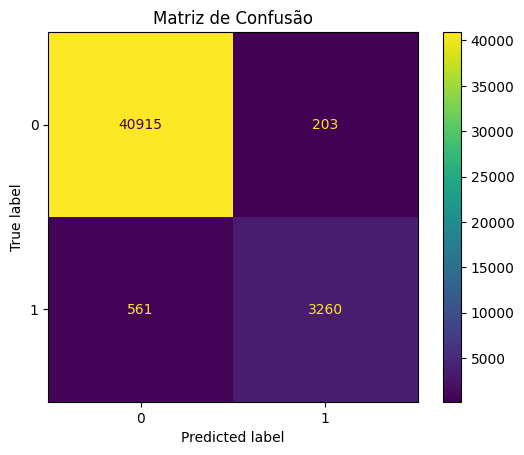

'\nMatriz de Confusão:\n [[40915   203] (MODELO  SEM peso)\n [  561  3260]]\n'

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_train_predictions)
print("Matriz de Confusão:\n", conf_matrix)

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predictions)
plt.title('Matriz de Confusão')
plt.show()

'''
Matriz de Confusão:
 [[40612   506]
 [  243  3578]]  (MODELO COM PESO)
'''
'''
Matriz de Confusão:
 [[40915   203] (MODELO  SEM peso)
 [  561  3260]]
'''

## Random forest regressor

### modelo original

In [611]:
from sklearn.ensemble import RandomForestRegressor

In [612]:
forest_reg = RandomForestRegressor(random_state=0, min_samples_split = 50, 
                     n_estimators=100) 

forest_reg.fit(x_train, y_train)
#usar somente 5 florestas
#aumentar splits

RandomForestRegressor(min_samples_split=50, random_state=0)

In [613]:
y_pred = [y_p for y_p in forest_reg.predict(x_train)]
some_cases = pd.DataFrame({'hospital_death': y_train, 'log reg prediction': y_pred})
some_cases.head()

,hospital_death,log reg prediction
53328,0,0.044648
4767,0,0.233908
2162,0,0.001608
8407,0,0.018691
43250,1,0.611499


In [614]:

y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_train)]
printPerformanceMeasures(model= forest_reg, y_true=y_train, y_pred=y_train_predictions)

RandomForestRegressor  ACCURACY =  0.9335321213200116
RandomForestRegressor  RMSE =  0.2578136510737716
RandomForestRegressor  MAE =  0.06646787867998843


<Axes: title={'center': 'Feature importance RandomForestRegressor(min_samples_split=50, random_state=0)'}>

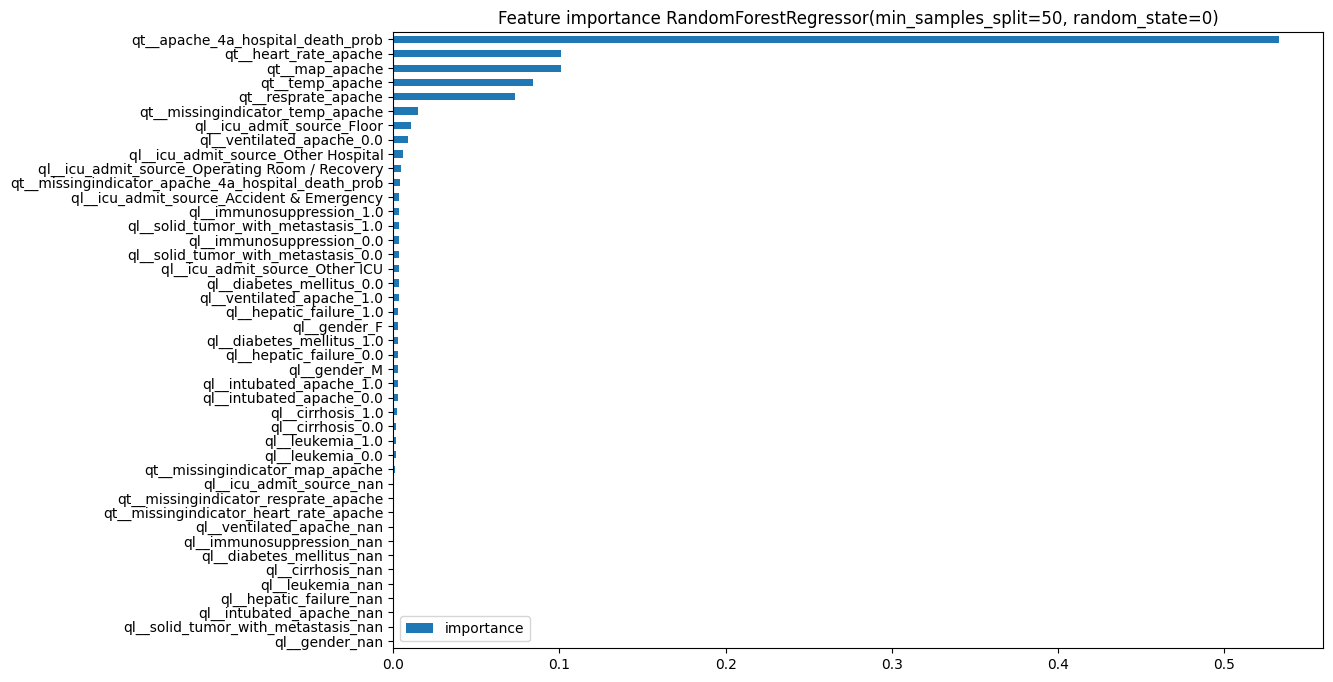

In [615]:
model = forest_reg
fig, ax = plt.subplots(figsize=(12, 8))
fig = pd.DataFrame(data=model.feature_importances_,
index=fullPipeline.get_feature_names_out(), 
columns=['importance'])
fig.sort_values(by=['importance']).plot(kind='barh', title=f'Feature importance {model}',ax=ax)

Matriz de Confusão:
 [[40813   305]
 [ 2682  1139]]


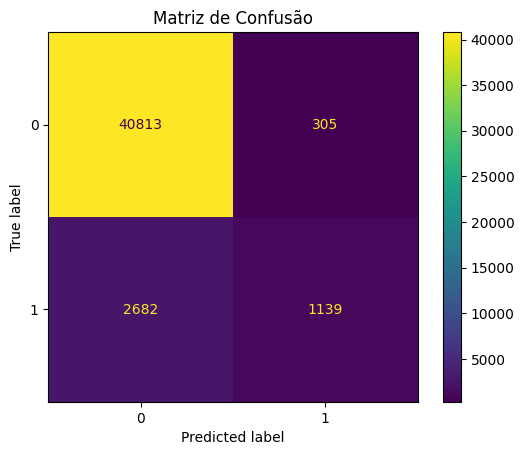

In [616]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# 1. Preparação dos dados
# Gerar um conjunto de dados de classificação binária
# e Matriz de Confusão
# Fazer previsões no conjunto de teste

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_train, (y_train_predictions))
print("Matriz de Confusão:\n", conf_matrix)

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train,y_train_predictions)
plt.title('Matriz de Confusão')
plt.show()

### modelo ajustado

<Axes: title={'center': 'Feature importance RandomForestRegressor(min_samples_split=50, random_state=0)'}>

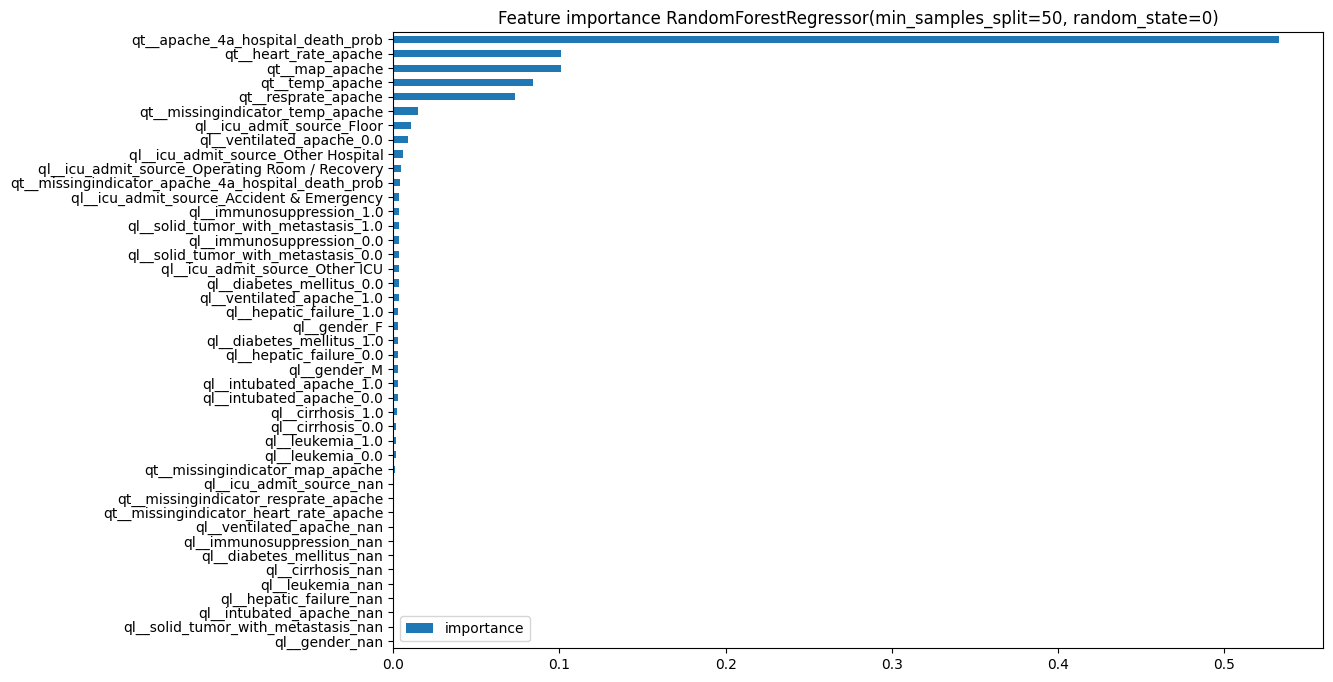

In [617]:
model = forest_reg
fig, ax = plt.subplots(figsize=(12, 8))
fig = pd.DataFrame(data=model.feature_importances_,
index=fullPipeline.get_feature_names_out(), 
columns=['importance'])
fig.sort_values(by=['importance']).plot(kind='barh', title=f'Feature importance {model}',ax=ax)

In [618]:
# Suponha que 'fullPipeline' seja um objeto Pipeline que inclui pré-processamento e o modelo
# e 'log_reg' seja o modelo de regressão logística treinado.
model = forest_reg
# Cria um DataFrame com os coeficientes e os nomes das características
coef_df = pd.DataFrame(data=model.feature_importances_, index=fullPipeline.get_feature_names_out(), columns=['coeficiente'])

# Ordena o DataFrame pelos valores absolutos dos coeficientes em ordem decrescente
coef_df['coef_abs'] = coef_df['coeficiente'].abs()
coef_df_sorted = coef_df.sort_values(by='coef_abs', ascending=False)

# Define os limites para selecionar as características importantes
limite_superior = 0.03
limite_inferior = -0.05

# Seleciona as características com coeficientes acima do limite superior ou abaixo do limite inferior
caracteristicas_importantes = coef_df_sorted[(coef_df_sorted['coef_abs'] > limite_superior) | (coef_df_sorted['coef_abs'] < limite_inferior)].index.tolist()

# Imprime as características importantes
#print("Características importantes:")
print(caracteristicas_importantes)


['qt__apache_4a_hospital_death_prob', 'qt__heart_rate_apache', 'qt__map_apache', 'qt__temp_apache', 'qt__resprate_apache']


In [619]:

# Suponha que x_train seja o seu numpy.ndarray
# Você pode criar um DataFrame a partir dele
x_train_df = pd.DataFrame(x_train, columns=fullPipeline.get_feature_names_out())

#Suponha que x_train_df seja o seu DataFrame
# Mantenha apenas as colunas 1 e 2
x_train_df = x_train_df[['qt__apache_4a_hospital_death_prob', 'qt__heart_rate_apache', 'qt__map_apache', 'qt__temp_apache', 'qt__resprate_apache']]
x_train_forest= x_train_df.to_numpy()

In [620]:
from sklearn.ensemble import RandomForestClassifier

In [621]:
class_weights = {0: 1.6, 1: 3}

forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=150,criterion= 'entropy',class_weight= class_weights,max_features= 'log2') 

forest_reg.fit(x_train_forest, y_train)
#usar somente 5 florestas
#aumentar splits

RandomForestClassifier(class_weight={0: 1.6, 1: 3}, criterion='entropy',
                       max_features='log2', min_samples_split=20,
                       n_estimators=150, random_state=0)

In [622]:
y_pred = [y_p for y_p in forest_reg.predict(x_train_forest)]
some_cases = pd.DataFrame({'hospital_death': y_train, 'log reg prediction': y_pred})
some_cases.head()

,hospital_death,log reg prediction
53328,0,0
4767,0,0
2162,0,0
8407,0,0
43250,1,1


In [623]:

y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_train_forest)]
printPerformanceMeasures(model= forest_reg, y_true=y_train, y_pred=y_train_predictions)

RandomForestClassifier  ACCURACY =  0.9483077060014686
RandomForestClassifier  RMSE =  0.22735939390869986
RandomForestClassifier  MAE =  0.05169229399853134


Matriz de Confusão:
 [[40732   386]
 [ 1937  1884]]


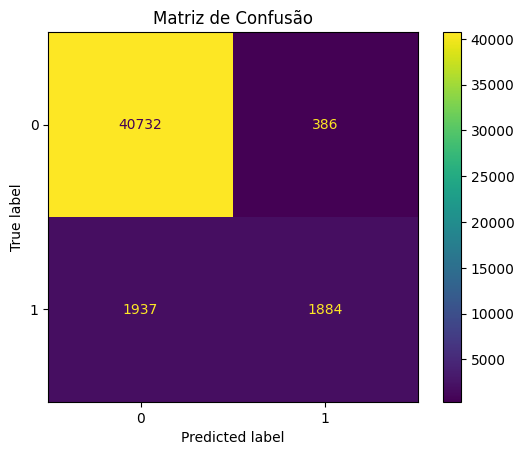

'\nMatriz de Confusão:\n [[40732   386]  (VARIAVEIS MAIORES q zero)\n [ 2051  1770]]\n'

In [624]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# 1. Preparação dos dados
# Gerar um conjunto de dados de classificação binária
# e Matriz de Confusão
# Fazer previsões no conjunto de teste

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_train, (y_train_predictions))
print("Matriz de Confusão:\n", conf_matrix)

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train,y_train_predictions)
plt.title('Matriz de Confusão')
plt.show()

'''
Matriz de Confusão:
 [[40732   386]
 [ 1937  1884]]  (POUCAS VARIAIVEIS)
'''

'''
Matriz de Confusão:
 [[40732   386]  (VARIAVEIS MAIORES q zero)
 [ 2051  1770]]
'''

## XGBoost Regression

### Modelo original

In [638]:
# %pip install xgboost
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train.shape[1])
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=43, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

In [639]:
y_pred = [y_p for y_p in xgb_reg.predict(x_train)]
some_cases = pd.DataFrame({'hospital_death': y_train, 'log reg prediction': y_pred})
some_cases.head()

,hospital_death,log reg prediction
53328,0,0.001622
4767,0,0.005567
2162,0,0.000048
8407,0,0.000177
43250,1,0.976351


In [640]:

y_train_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_train)]
printPerformanceMeasures(model= tree_reg, y_true=y_train, y_pred=y_train_predictions)

DecisionTreeClassifier  ACCURACY =  0.9987983711253032
DecisionTreeClassifier  RMSE =  0.03466451895954726
DecisionTreeClassifier  MAE =  0.0012016288746968112


Matriz de Confusão:
 [[41116     2]
 [   52  3769]]


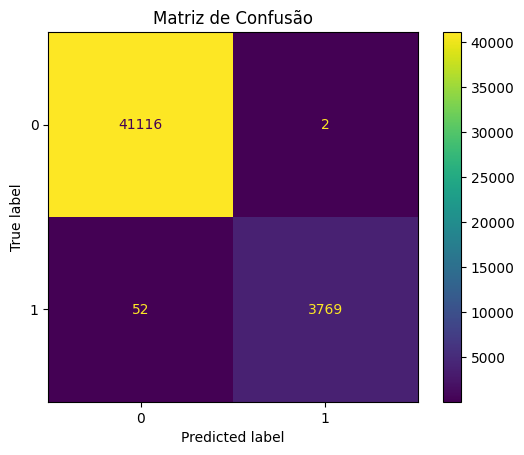

'\nMatriz de Confusão:\n [[41116     2]\n [   52  3769]]   (XGBOOST ORIGINAL)\n'

In [641]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_train_predictions)
print("Matriz de Confusão:\n", conf_matrix)

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predictions)
plt.title('Matriz de Confusão')
plt.show()


'''
Matriz de Confusão:
 [[41116     2]
 [   52  3769]]   (XGBOOST ORIGINAL)
'''

In [629]:
#Contruir amostra balanceada no treinamento